### Problem Statement
Chukwudi Supermarkets is a leading indigenous chain of supermarkets with headquarters in Oshodi, Lagos, Nigeria. Its success has been driven by strong entrepreneurial value and commitment to excellence in providing products to all segments of the population at value for money prices, as underscored by its slogan "Cheap and Cheerful". It offers over 1,500 products across 10 stores in different cities of Nigeria.

Mr. M.N. Chukwudi, the Chairman of the company is exploring a strategic expansion into more cities in Nigeria but he wants to understand what product gives better margin at specific stores. For example a tin of milk which sells for N100 in one of his supermarket branches may also be sold at N110 at another supermarket within Mr Chukwudi's chain of supermarkets. He needs to therefore understand what type of product, market clusters and supermarket type (location, age, size) will give more margin as he plans to expand to more cities in the country.

You have been engaged as the new Retail Data Analysts to build a predictive model and find out the sales of each product at a particular supermarket. With your guided analysis, Mr Chukwudi will understand the key characteristics of products and supermarkets driving sales and be better informed on an optimal template for its planned expansion to other states in Nigeria.

The data provided comprises of transaction records of all the supermarket at product level. Please note that the data may have missing values as some stores might not report all the data due to technical glitches as a result of NEPA/generator failure.

### Evaluation Metric

Your model performance will be evaluated on the basis of your prediction of the sales for the test data, which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

Your sales predictions will be evaluated using the Root Mean Square Error value

#### Hackacth link
https://www.kaggle.com/c/dsn-ai-futa-challenge/overview


In [1]:

import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm, skew 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRFRegressor,XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor



In [2]:

# function to compute label encoding
def freq_enc(df,cols):
    for col in cols:
        df[col] = df[col].map(df[col].value_counts().to_dict())/len(df)
    return df

#fuction to compute label encoding
def label_enc(df,cols):
    for col in cols:
        df[col] = df[col].factorize()[0]
    return df

In [3]:
# Read in the data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')


In [4]:
train.head(5)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType,Product_Supermarket_Sales
0,NCA29,CHUKWUDI046,NCA29_CHUKWUDI046,10.500,Low Fat,0.027276,Household,428.28,2004,Small,Cluster 1,Supermarket Type1,399.999418,8983.31
1,FDG53,CHUKWUDI049,FDG53_CHUKWUDI049,10.000,Low Fat,0.045928,Frozen Foods,345.30,2006,Medium,Cluster 1,Supermarket Type1,388.071094,4893.63
2,NCN05,CHUKWUDI045,NCN05_CHUKWUDI045,8.235,Low Fat,0.014489,Health and Hygiene,459.49,2009,NaN,Cluster 2,Supermarket Type1,367.143029,7323.80
3,NCV17,CHUKWUDI046,NCV17_CHUKWUDI046,18.850,Low Fat,0.016108,Health and Hygiene,324.41,2004,Small,Cluster 1,Supermarket Type1,367.143029,7541.85
4,FDK03,CHUKWUDI045,FDK03_CHUKWUDI045,12.600,Normal Fat,0.074070,Dairy,635.59,2009,NaN,Cluster 2,Supermarket Type1,409.504343,11445.10


In [5]:
test.head(5)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Average_Price_per_ProductType
0,FDY57,CHUKWUDI013,FDY57_CHUKWUDI013,20.20,Normal Fat,0.121153,Snack Foods,243.44,1994,High,Cluster 3,Supermarket Type1,395.352190
1,FDY10,CHUKWUDI018,FDY10_CHUKWUDI018,17.60,Low Fat,0.049268,Snack Foods,282.54,2016,Medium,Cluster 3,Supermarket Type2,395.352190
2,FDO40,CHUKWUDI018,FDO40_CHUKWUDI018,17.10,Low Fat,0.032761,Frozen Foods,372.10,2016,Medium,Cluster 3,Supermarket Type2,388.071094
3,NCQ43,CHUKWUDI018,NCQ43_CHUKWUDI018,17.75,Low Fat,0.000000,Others,271.73,2016,Medium,Cluster 3,Supermarket Type2,388.607700
4,NCC07,CHUKWUDI046,NCC07_CHUKWUDI046,19.60,Low Fat,0.023951,Household,264.24,2004,Small,Cluster 1,Supermarket Type1,399.999418


In [6]:
print('Train size is {}'.format(train.shape))
print('Test size is {}'.format(test.shape))

Train size is (2994, 14)
Test size is (1996, 13)


In [7]:
# Dropping 'Product_Supermarket_Identifier' is no use to the model
id_cols = ['Product_Supermarket_Identifier']

train.drop(id_cols, axis=1, inplace=True)
test.drop(id_cols, axis=1, inplace=True)

print('Train size after dropping three columns is {}'.format(train.shape))
print('Test size after dropping three columns  is {}'.format(test.shape))

Train size after dropping three columns is (2994, 13)
Test size after dropping three columns  is (1996, 12)


### Dealing with missing values

In [8]:
train['Product_Weight'].fillna(train['Product_Weight'].mean(),inplace=True)
train['Supermarket _Size'].fillna(train['Supermarket _Size'].mode()[0],inplace=True)

test['Product_Weight'].fillna(test['Product_Weight'].mean(),inplace=True)
test['Supermarket _Size'].fillna(test['Supermarket _Size'].mode()[0],inplace=True)

### Some feature engineering

In [9]:
#Create the log version of product price
train['Product_Price_log'] = np.log1p(train['Product_Price'])
train['Product_Shelf_Visibility_log'] = np.log1p(train['Product_Shelf_Visibility'])

#Create some cross features
train['Product_Price_per_Product_Fat_Content_mean'] = train['Product_Price']/train['Product_Fat_Content'].map(train.groupby('Product_Fat_Content').mean()['Product_Price'].to_dict())
train['Product_Price_per_Supermarket_Location_Type_mean'] = train['Product_Price']/train['Supermarket_Location_Type'].map(train.groupby('Supermarket_Location_Type').mean()['Product_Price'].to_dict())
train['Product_Price_per_Supermarket_Size_mean'] = train['Product_Price']/train['Supermarket _Size'].map(train.groupby('Supermarket _Size').mean()['Product_Price'].to_dict())
train['Product_Price_per_Product_Type_mean'] = train['Product_Price']/train['Product_Type'].map(train.groupby('Product_Type').mean()['Product_Price'].to_dict())
train['Product_Price_per_Supermarket_Type_mean'] = train['Product_Price']/train['Supermarket_Type'].map(train.groupby('Supermarket_Type').mean()['Product_Price'].to_dict())
train['Product_Price_per_Product_Identifier_mean'] = train['Product_Price']/train['Product_Identifier'].map(train.groupby('Product_Identifier').mean()['Product_Price'].to_dict())
train['Product_Price_per_Supermarket_Opening_year_mean'] = train['Product_Price']/train['Supermarket_Opening_Year'].map(train.groupby('Supermarket_Opening_Year').mean()['Product_Price'].to_dict())
train['Product_Price_per_Supermarket_Identifier_mean'] = train['Product_Price']/train['Supermarket_Identifier'].map(train.groupby('Supermarket_Identifier').mean()['Product_Price'].to_dict())

train['cross_Price_weight'] = train['Product_Price'] * train['Product_Weight']
train['cross_Price_visibility'] = train['Product_Price'] * train['Product_Shelf_Visibility']
train['cross_Price_visibility_weight'] = train['Product_Price'] * train['Product_Shelf_Visibility'] * train['Product_Weight']


#Create the log version of product price
test['Product_Price_log'] = np.log1p(test['Product_Price'])
test['Product_Shelf_Visibility_log'] = np.log1p(test['Product_Shelf_Visibility'])

#Create some cross features
test['Product_Price_per_Product_Fat_Content_mean'] = test['Product_Price']/test['Product_Fat_Content'].map(test.groupby('Product_Fat_Content').mean()['Product_Price'].to_dict())
test['Product_Price_per_Supermarket_Location_Type_mean'] = test['Product_Price']/test['Supermarket_Location_Type'].map(test.groupby('Supermarket_Location_Type').mean()['Product_Price'].to_dict())
test['Product_Price_per_Supermarket_Size_mean'] = test['Product_Price']/test['Supermarket _Size'].map(test.groupby('Supermarket _Size').mean()['Product_Price'].to_dict())
test['Product_Price_per_Product_Type_mean'] = test['Product_Price']/test['Product_Type'].map(test.groupby('Product_Type').mean()['Product_Price'].to_dict())
test['Product_Price_per_Supermarket_Type_mean'] = test['Product_Price']/test['Supermarket_Type'].map(test.groupby('Supermarket_Type').mean()['Product_Price'].to_dict())
test['Product_Price_per_Product_Identifier_mean'] = test['Product_Price']/test['Product_Identifier'].map(test.groupby('Product_Identifier').mean()['Product_Price'].to_dict())
test['Product_Price_per_Supermarket_Opening_year_mean'] = test['Product_Price']/test['Supermarket_Opening_Year'].map(test.groupby('Supermarket_Opening_Year').mean()['Product_Price'].to_dict())
test['Product_Price_per_Supermarket_Identifier_mean'] = test['Product_Price']/test['Supermarket_Identifier'].map(test.groupby('Supermarket_Identifier').mean()['Product_Price'].to_dict())

test['cross_Price_weight'] = test['Product_Price'] * test['Product_Weight']
test['cross_Price_visibility'] = test['Product_Price'] * test['Product_Shelf_Visibility']
test['cross_Price_visibility_weight'] = test['Product_Price'] * test['Product_Shelf_Visibility'] * test['Product_Weight']

In [10]:
#check the number of unique year in 'Supermarket_Opening_Year' feature
train['Supermarket_Opening_Year'].unique()

array([2004, 2006, 2009, 1992, 2014, 2005, 1994, 2016, 2011], dtype=int64)

In [11]:
# Changing them to categories in order to encode them
dict_year = {2005:'A', 1994:'B', 2014:'C', 2016:'D', 2011:'E', 2009:'F', 1992:'G', 2006:'H', 2004:'I'}


train['Supermarket_Opening_Year'] = train['Supermarket_Opening_Year'].map(dict_year)
test['Supermarket_Opening_Year'] = test['Supermarket_Opening_Year'].map(dict_year)


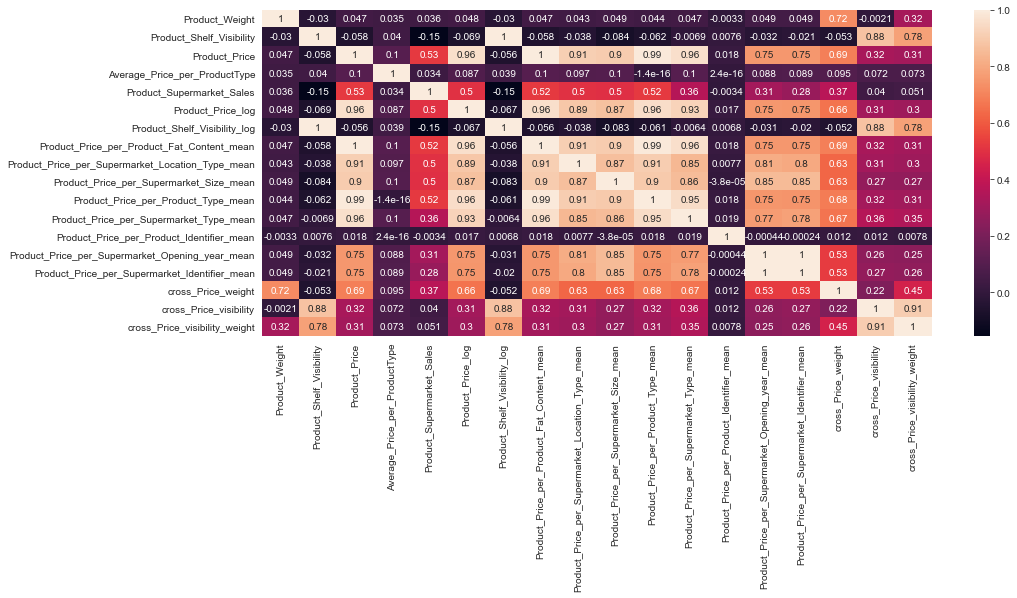

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(),annot=True)

In [13]:
# make a copy of both the test data and the train data
train_copy = train.copy()
test_copy = test.copy()

In [14]:
train = train.drop('Product_Identifier',axis=1)
test = test.drop('Product_Identifier',axis=1)

In [15]:
# Combining both frequency and label encoding for categorical variables
cols = ['Product_Fat_Content','Product_Type','Supermarket _Size',
        'Supermarket_Location_Type','Supermarket_Opening_Year','Supermarket_Type','Supermarket_Identifier']

train = label_enc(train,cols)
test = label_enc(test,cols)

for col in cols:
    train[col+"_freq"] = train[col].map(train[col].value_counts().to_dict())/len(train)
    test[col+"_freq"] = test[col].map(test[col].value_counts().to_dict())/len(test)
    

In [16]:
#splitting the data into X and y for training.
X = train.drop('Product_Supermarket_Sales',axis=1)
y = train['Product_Supermarket_Sales']

In [17]:
X.shape,test.shape

((2994, 31), (1996, 31))

In [18]:
#I drop this features based on feature importance after training random forest on it
to_drop =  ['Product_Fat_Content_freq','Supermarket _Size_freq',
            'Average_Price_per_ProductType','Product_Fat_Content',
           'Product_Type_freq','cross_Price_visibility']

In [19]:
X.drop(to_drop,axis=1,inplace=True)
test.drop(to_drop,axis=1,inplace=True)

**Modelling**

In [29]:
cat = CatBoostRegressor(n_estimators=5000,max_depth=3,eval_metric='RMSE',reg_lambda=50,random_state=101)

In [30]:
# Using kfold of 7 splits
kf = KFold(n_splits=7,random_state=2020,shuffle=True)

In [31]:
scores = []
test_scores = np.zeros(len(test))
for fold,(tr_in,te_in) in enumerate(kf.split(X)):
    print(f"================================Fold{fold}====================================")
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],early_stopping_rounds=500,use_best_model=True)
    scores.append(np.sqrt(mean_squared_error(y_test,cat.predict(X_test))))
    test_scores += cat.predict(test)
    

================================Fold0====================================
0:	learn: 4440.0366443	test: 4440.0366443	test1: 4430.7255096	best: 4430.7255096 (0)	total: 5.11ms	remaining: 25.6s
1:	learn: 4388.8413490	test: 4388.8413490	test1: 4387.8440469	best: 4387.8440469 (1)	total: 9.61ms	remaining: 24s
2:	learn: 4335.9377377	test: 4335.9377377	test1: 4342.7188497	best: 4342.7188497 (2)	total: 14.3ms	remaining: 23.9s
3:	learn: 4286.1373995	test: 4286.1373995	test1: 4299.1235484	best: 4299.1235484 (3)	total: 19.1ms	remaining: 23.8s
4:	learn: 4239.4987882	test: 4239.4987882	test1: 4259.8712607	best: 4259.8712607 (4)	total: 23.9ms	remaining: 23.9s
5:	learn: 4191.6153529	test: 4191.6153529	test1: 4219.4354278	best: 4219.4354278 (5)	total: 26.8ms	remaining: 22.3s
6:	learn: 4150.6174499	test: 4150.6174499	test1: 4186.9649526	best: 4186.9649526 (6)	total: 29.6ms	remaining: 21.1s
7:	learn: 4106.4876319	test: 4106.4876319	test1: 4150.3393281	best: 4150.3393281 (7)	total: 31.9ms	remaining: 19.9s


91:	learn: 2957.4825346	test: 2957.4825346	test1: 3283.9332505	best: 3283.9332505 (91)	total: 183ms	remaining: 9.77s
92:	learn: 2954.7649153	test: 2954.7649153	test1: 3282.3125889	best: 3282.3125889 (92)	total: 186ms	remaining: 9.79s
93:	learn: 2951.8434760	test: 2951.8434760	test1: 3279.6852280	best: 3279.6852280 (93)	total: 188ms	remaining: 9.82s
94:	learn: 2949.0831559	test: 2949.0831559	test1: 3277.5391830	best: 3277.5391830 (94)	total: 190ms	remaining: 9.83s
95:	learn: 2946.9771593	test: 2946.9771593	test1: 3276.5836812	best: 3276.5836812 (95)	total: 194ms	remaining: 9.92s
96:	learn: 2944.5454879	test: 2944.5454879	test1: 3274.9160386	best: 3274.9160386 (96)	total: 196ms	remaining: 9.91s
97:	learn: 2942.3384153	test: 2942.3384153	test1: 3274.3281044	best: 3274.3281044 (97)	total: 198ms	remaining: 9.91s
98:	learn: 2940.3410174	test: 2940.3410174	test1: 3273.8974646	best: 3273.8974646 (98)	total: 200ms	remaining: 9.9s
99:	learn: 2938.2612367	test: 2938.2612367	test1: 3272.7787579	be

172:	learn: 2876.2905670	test: 2876.2905670	test1: 3258.1933472	best: 3256.8237460 (153)	total: 335ms	remaining: 9.34s
173:	learn: 2875.8132804	test: 2875.8132804	test1: 3258.2657175	best: 3256.8237460 (153)	total: 337ms	remaining: 9.34s
174:	learn: 2875.5186631	test: 2875.5186631	test1: 3258.1380730	best: 3256.8237460 (153)	total: 339ms	remaining: 9.34s
175:	learn: 2875.2081028	test: 2875.2081028	test1: 3258.0191503	best: 3256.8237460 (153)	total: 341ms	remaining: 9.35s
176:	learn: 2874.7202778	test: 2874.7202778	test1: 3258.3465912	best: 3256.8237460 (153)	total: 343ms	remaining: 9.34s
177:	learn: 2874.4204235	test: 2874.4204235	test1: 3258.4743160	best: 3256.8237460 (153)	total: 345ms	remaining: 9.34s
178:	learn: 2874.0492501	test: 2874.0492501	test1: 3258.8689371	best: 3256.8237460 (153)	total: 347ms	remaining: 9.34s
179:	learn: 2873.6047787	test: 2873.6047787	test1: 3258.5074534	best: 3256.8237460 (153)	total: 349ms	remaining: 9.34s
180:	learn: 2873.3953318	test: 2873.3953318	test

264:	learn: 2851.6530431	test: 2851.6530431	test1: 3268.4632414	best: 3256.8237460 (153)	total: 494ms	remaining: 8.83s
265:	learn: 2851.5932787	test: 2851.5932787	test1: 3268.4681677	best: 3256.8237460 (153)	total: 496ms	remaining: 8.83s
266:	learn: 2851.1803245	test: 2851.1803245	test1: 3268.6225182	best: 3256.8237460 (153)	total: 498ms	remaining: 8.83s
267:	learn: 2850.7464118	test: 2850.7464118	test1: 3268.7612546	best: 3256.8237460 (153)	total: 500ms	remaining: 8.84s
268:	learn: 2850.6814969	test: 2850.6814969	test1: 3268.7632819	best: 3256.8237460 (153)	total: 502ms	remaining: 8.84s
269:	learn: 2850.3653064	test: 2850.3653064	test1: 3269.1036206	best: 3256.8237460 (153)	total: 504ms	remaining: 8.83s
270:	learn: 2849.8785298	test: 2849.8785298	test1: 3269.7111908	best: 3256.8237460 (153)	total: 506ms	remaining: 8.83s
271:	learn: 2849.3976144	test: 2849.3976144	test1: 3269.7771342	best: 3256.8237460 (153)	total: 508ms	remaining: 8.83s
272:	learn: 2849.2733958	test: 2849.2733958	test

358:	learn: 2837.2372073	test: 2837.2372073	test1: 3275.9264847	best: 3256.8237460 (153)	total: 656ms	remaining: 8.48s
359:	learn: 2837.1315881	test: 2837.1315881	test1: 3276.0203868	best: 3256.8237460 (153)	total: 658ms	remaining: 8.47s
360:	learn: 2837.0749478	test: 2837.0749478	test1: 3276.0837106	best: 3256.8237460 (153)	total: 660ms	remaining: 8.48s
361:	learn: 2837.0371716	test: 2837.0371716	test1: 3276.1315174	best: 3256.8237460 (153)	total: 662ms	remaining: 8.48s
362:	learn: 2836.9800171	test: 2836.9800171	test1: 3276.2027188	best: 3256.8237460 (153)	total: 664ms	remaining: 8.48s
363:	learn: 2836.9084085	test: 2836.9084085	test1: 3276.2936320	best: 3256.8237460 (153)	total: 666ms	remaining: 8.48s
364:	learn: 2836.8704902	test: 2836.8704902	test1: 3276.3218228	best: 3256.8237460 (153)	total: 668ms	remaining: 8.48s
365:	learn: 2836.7653098	test: 2836.7653098	test1: 3276.3475666	best: 3256.8237460 (153)	total: 670ms	remaining: 8.48s
366:	learn: 2836.5858964	test: 2836.5858964	test

430:	learn: 2828.6806345	test: 2828.6806345	test1: 3282.3988578	best: 3256.8237460 (153)	total: 795ms	remaining: 8.42s
431:	learn: 2828.6329806	test: 2828.6329806	test1: 3282.4490166	best: 3256.8237460 (153)	total: 797ms	remaining: 8.42s
432:	learn: 2828.5670301	test: 2828.5670301	test1: 3282.4558148	best: 3256.8237460 (153)	total: 798ms	remaining: 8.42s
433:	learn: 2828.2690021	test: 2828.2690021	test1: 3282.3837800	best: 3256.8237460 (153)	total: 800ms	remaining: 8.42s
434:	learn: 2828.2045685	test: 2828.2045685	test1: 3282.5390341	best: 3256.8237460 (153)	total: 802ms	remaining: 8.42s
435:	learn: 2828.1416840	test: 2828.1416840	test1: 3282.6043427	best: 3256.8237460 (153)	total: 804ms	remaining: 8.42s
436:	learn: 2828.0915984	test: 2828.0915984	test1: 3282.6617168	best: 3256.8237460 (153)	total: 806ms	remaining: 8.42s
437:	learn: 2828.0282368	test: 2828.0282368	test1: 3282.6735502	best: 3256.8237460 (153)	total: 808ms	remaining: 8.42s
438:	learn: 2827.8209506	test: 2827.8209506	test

512:	learn: 2814.5081915	test: 2814.5081915	test1: 3289.9900550	best: 3256.8237460 (153)	total: 945ms	remaining: 8.26s
513:	learn: 2814.4630230	test: 2814.4630230	test1: 3290.0620882	best: 3256.8237460 (153)	total: 947ms	remaining: 8.26s
514:	learn: 2814.4306377	test: 2814.4306377	test1: 3290.0578952	best: 3256.8237460 (153)	total: 949ms	remaining: 8.26s
515:	learn: 2814.3591130	test: 2814.3591130	test1: 3290.2214746	best: 3256.8237460 (153)	total: 950ms	remaining: 8.26s
516:	learn: 2814.2261728	test: 2814.2261728	test1: 3290.4356197	best: 3256.8237460 (153)	total: 952ms	remaining: 8.26s
517:	learn: 2814.1703238	test: 2814.1703238	test1: 3290.5734416	best: 3256.8237460 (153)	total: 955ms	remaining: 8.26s
518:	learn: 2814.1170453	test: 2814.1170453	test1: 3290.6299706	best: 3256.8237460 (153)	total: 957ms	remaining: 8.26s
519:	learn: 2814.0621397	test: 2814.0621397	test1: 3290.6327082	best: 3256.8237460 (153)	total: 959ms	remaining: 8.26s
520:	learn: 2814.0189921	test: 2814.0189921	test

599:	learn: 2800.4905554	test: 2800.4905554	test1: 3296.9416842	best: 3256.8237460 (153)	total: 1.1s	remaining: 8.09s
600:	learn: 2800.3234329	test: 2800.3234329	test1: 3297.1274066	best: 3256.8237460 (153)	total: 1.1s	remaining: 8.09s
601:	learn: 2800.0219424	test: 2800.0219424	test1: 3297.3400217	best: 3256.8237460 (153)	total: 1.11s	remaining: 8.09s
602:	learn: 2799.8577553	test: 2799.8577553	test1: 3297.5267943	best: 3256.8237460 (153)	total: 1.11s	remaining: 8.09s
603:	learn: 2799.6922559	test: 2799.6922559	test1: 3297.9524104	best: 3256.8237460 (153)	total: 1.11s	remaining: 8.09s
604:	learn: 2799.5085265	test: 2799.5085265	test1: 3297.9531487	best: 3256.8237460 (153)	total: 1.11s	remaining: 8.09s
605:	learn: 2799.4161664	test: 2799.4161664	test1: 3298.0557104	best: 3256.8237460 (153)	total: 1.11s	remaining: 8.09s
606:	learn: 2798.8825194	test: 2798.8825194	test1: 3298.5166624	best: 3256.8237460 (153)	total: 1.12s	remaining: 8.09s
607:	learn: 2798.5990377	test: 2798.5990377	test1:

37:	learn: 3390.6229817	test: 3390.6229817	test1: 3297.8394958	best: 3297.8394958 (37)	total: 79.3ms	remaining: 10.4s
38:	learn: 3375.7797980	test: 3375.7797980	test1: 3281.5819828	best: 3281.5819828 (38)	total: 81.7ms	remaining: 10.4s
39:	learn: 3361.0058045	test: 3361.0058045	test1: 3266.5166512	best: 3266.5166512 (39)	total: 85.8ms	remaining: 10.6s
40:	learn: 3347.1961282	test: 3347.1961282	test1: 3251.2786649	best: 3251.2786649 (40)	total: 87.7ms	remaining: 10.6s
41:	learn: 3334.8276557	test: 3334.8276557	test1: 3238.3532929	best: 3238.3532929 (41)	total: 89.7ms	remaining: 10.6s
42:	learn: 3321.9948592	test: 3321.9948592	test1: 3224.2242952	best: 3224.2242952 (42)	total: 91.6ms	remaining: 10.6s
43:	learn: 3309.6569562	test: 3309.6569562	test1: 3211.3058766	best: 3211.3058766 (43)	total: 93.5ms	remaining: 10.5s
44:	learn: 3297.4689626	test: 3297.4689626	test1: 3200.1847088	best: 3200.1847088 (44)	total: 95.5ms	remaining: 10.5s
45:	learn: 3287.0312950	test: 3287.0312950	test1: 3190.5

123:	learn: 2977.5196776	test: 2977.5196776	test1: 2874.9469447	best: 2874.9469447 (123)	total: 233ms	remaining: 9.15s
124:	learn: 2976.7411152	test: 2976.7411152	test1: 2874.5382535	best: 2874.5382535 (124)	total: 235ms	remaining: 9.15s
125:	learn: 2975.8464324	test: 2975.8464324	test1: 2873.5090403	best: 2873.5090403 (125)	total: 237ms	remaining: 9.16s
126:	learn: 2974.8861690	test: 2974.8861690	test1: 2872.4430995	best: 2872.4430995 (126)	total: 239ms	remaining: 9.17s
127:	learn: 2973.8087993	test: 2973.8087993	test1: 2871.3538091	best: 2871.3538091 (127)	total: 241ms	remaining: 9.17s
128:	learn: 2973.0520520	test: 2973.0520520	test1: 2870.5252958	best: 2870.5252958 (128)	total: 243ms	remaining: 9.17s
129:	learn: 2972.2985196	test: 2972.2985196	test1: 2870.1690232	best: 2870.1690232 (129)	total: 245ms	remaining: 9.17s
130:	learn: 2971.3703068	test: 2971.3703068	test1: 2869.2367136	best: 2869.2367136 (130)	total: 247ms	remaining: 9.17s
131:	learn: 2970.7388992	test: 2970.7388992	test

210:	learn: 2937.1840592	test: 2937.1840592	test1: 2844.4314174	best: 2844.4314174 (210)	total: 387ms	remaining: 8.79s
211:	learn: 2936.9958016	test: 2936.9958016	test1: 2844.4031488	best: 2844.4031488 (211)	total: 390ms	remaining: 8.8s
212:	learn: 2936.6882637	test: 2936.6882637	test1: 2844.0650647	best: 2844.0650647 (212)	total: 392ms	remaining: 8.8s
213:	learn: 2936.2010028	test: 2936.2010028	test1: 2844.2540794	best: 2844.0650647 (212)	total: 394ms	remaining: 8.81s
214:	learn: 2935.9216600	test: 2935.9216600	test1: 2843.9245099	best: 2843.9245099 (214)	total: 396ms	remaining: 8.81s
215:	learn: 2935.8271681	test: 2935.8271681	test1: 2843.8945513	best: 2843.8945513 (215)	total: 398ms	remaining: 8.81s
216:	learn: 2935.3811403	test: 2935.3811403	test1: 2844.2116953	best: 2843.8945513 (215)	total: 401ms	remaining: 8.85s
217:	learn: 2935.1917868	test: 2935.1917868	test1: 2844.1523718	best: 2843.8945513 (215)	total: 404ms	remaining: 8.85s
218:	learn: 2934.9052533	test: 2934.9052533	test1:

284:	learn: 2919.8214523	test: 2919.8214523	test1: 2842.2978243	best: 2841.8482253 (259)	total: 526ms	remaining: 8.7s
285:	learn: 2919.5505980	test: 2919.5505980	test1: 2842.1724232	best: 2841.8482253 (259)	total: 529ms	remaining: 8.71s
286:	learn: 2918.9048659	test: 2918.9048659	test1: 2842.5689810	best: 2841.8482253 (259)	total: 531ms	remaining: 8.71s
287:	learn: 2918.8705209	test: 2918.8705209	test1: 2842.5573434	best: 2841.8482253 (259)	total: 532ms	remaining: 8.71s
288:	learn: 2918.6983004	test: 2918.6983004	test1: 2842.6934220	best: 2841.8482253 (259)	total: 534ms	remaining: 8.71s
289:	learn: 2918.2243804	test: 2918.2243804	test1: 2842.7335167	best: 2841.8482253 (259)	total: 536ms	remaining: 8.71s
290:	learn: 2917.8752725	test: 2917.8752725	test1: 2842.9975615	best: 2841.8482253 (259)	total: 540ms	remaining: 8.74s
291:	learn: 2917.7913351	test: 2917.7913351	test1: 2843.0448351	best: 2841.8482253 (259)	total: 542ms	remaining: 8.73s
292:	learn: 2917.5321344	test: 2917.5321344	test1

369:	learn: 2902.7855638	test: 2902.7855638	test1: 2846.1574792	best: 2841.8482253 (259)	total: 677ms	remaining: 8.48s
370:	learn: 2902.3497985	test: 2902.3497985	test1: 2846.5859387	best: 2841.8482253 (259)	total: 679ms	remaining: 8.47s
371:	learn: 2902.2658650	test: 2902.2658650	test1: 2846.5225422	best: 2841.8482253 (259)	total: 682ms	remaining: 8.49s
372:	learn: 2901.9434982	test: 2901.9434982	test1: 2846.7555207	best: 2841.8482253 (259)	total: 684ms	remaining: 8.49s
373:	learn: 2901.5216886	test: 2901.5216886	test1: 2847.1838645	best: 2841.8482253 (259)	total: 686ms	remaining: 8.49s
374:	learn: 2901.3834850	test: 2901.3834850	test1: 2847.3203004	best: 2841.8482253 (259)	total: 688ms	remaining: 8.49s
375:	learn: 2901.3049938	test: 2901.3049938	test1: 2847.2969051	best: 2841.8482253 (259)	total: 690ms	remaining: 8.48s
376:	learn: 2901.1783196	test: 2901.1783196	test1: 2847.3644302	best: 2841.8482253 (259)	total: 692ms	remaining: 8.49s
377:	learn: 2900.8311175	test: 2900.8311175	test

460:	learn: 2885.1209657	test: 2885.1209657	test1: 2854.9703847	best: 2841.8482253 (259)	total: 833ms	remaining: 8.21s
461:	learn: 2885.0485377	test: 2885.0485377	test1: 2854.9127332	best: 2841.8482253 (259)	total: 835ms	remaining: 8.2s
462:	learn: 2884.8512994	test: 2884.8512994	test1: 2854.9816505	best: 2841.8482253 (259)	total: 837ms	remaining: 8.21s
463:	learn: 2884.7806773	test: 2884.7806773	test1: 2855.0343766	best: 2841.8482253 (259)	total: 840ms	remaining: 8.21s
464:	learn: 2884.2500359	test: 2884.2500359	test1: 2854.8958294	best: 2841.8482253 (259)	total: 842ms	remaining: 8.21s
465:	learn: 2883.9304365	test: 2883.9304365	test1: 2855.0514435	best: 2841.8482253 (259)	total: 844ms	remaining: 8.21s
466:	learn: 2883.4985107	test: 2883.4985107	test1: 2855.3725321	best: 2841.8482253 (259)	total: 846ms	remaining: 8.21s
467:	learn: 2883.4642831	test: 2883.4642831	test1: 2855.3691542	best: 2841.8482253 (259)	total: 848ms	remaining: 8.21s
468:	learn: 2883.1212114	test: 2883.1212114	test1

549:	learn: 2866.7210573	test: 2866.7210573	test1: 2859.8037526	best: 2841.8482253 (259)	total: 988ms	remaining: 7.99s
550:	learn: 2866.4986569	test: 2866.4986569	test1: 2859.5770333	best: 2841.8482253 (259)	total: 990ms	remaining: 7.99s
551:	learn: 2866.3845147	test: 2866.3845147	test1: 2859.7968706	best: 2841.8482253 (259)	total: 992ms	remaining: 7.99s
552:	learn: 2866.1053005	test: 2866.1053005	test1: 2860.2022594	best: 2841.8482253 (259)	total: 995ms	remaining: 8s
553:	learn: 2866.0793193	test: 2866.0793193	test1: 2860.2142017	best: 2841.8482253 (259)	total: 996ms	remaining: 8s
554:	learn: 2865.9768797	test: 2865.9768797	test1: 2860.3067317	best: 2841.8482253 (259)	total: 998ms	remaining: 8s
555:	learn: 2865.9502272	test: 2865.9502272	test1: 2860.3110561	best: 2841.8482253 (259)	total: 1s	remaining: 7.99s
556:	learn: 2865.8453101	test: 2865.8453101	test1: 2860.3357896	best: 2841.8482253 (259)	total: 1s	remaining: 7.99s
557:	learn: 2865.8086799	test: 2865.8086799	test1: 2860.3420481

641:	learn: 2852.0172419	test: 2852.0172419	test1: 2862.8035837	best: 2841.8482253 (259)	total: 1.14s	remaining: 7.77s
642:	learn: 2851.7930792	test: 2851.7930792	test1: 2862.9620583	best: 2841.8482253 (259)	total: 1.15s	remaining: 7.77s
643:	learn: 2851.2383181	test: 2851.2383181	test1: 2863.6390515	best: 2841.8482253 (259)	total: 1.15s	remaining: 7.77s
644:	learn: 2850.8836686	test: 2850.8836686	test1: 2863.5464358	best: 2841.8482253 (259)	total: 1.15s	remaining: 7.77s
645:	learn: 2850.6791006	test: 2850.6791006	test1: 2863.7556696	best: 2841.8482253 (259)	total: 1.15s	remaining: 7.77s
646:	learn: 2850.5128123	test: 2850.5128123	test1: 2863.7058343	best: 2841.8482253 (259)	total: 1.15s	remaining: 7.77s
647:	learn: 2850.2623291	test: 2850.2623291	test1: 2863.7991331	best: 2841.8482253 (259)	total: 1.16s	remaining: 7.77s
648:	learn: 2850.0502907	test: 2850.0502907	test1: 2864.0271949	best: 2841.8482253 (259)	total: 1.16s	remaining: 7.77s
649:	learn: 2850.0047558	test: 2850.0047558	test

735:	learn: 2835.5419274	test: 2835.5419274	test1: 2868.6770871	best: 2841.8482253 (259)	total: 1.3s	remaining: 7.57s
736:	learn: 2835.4969449	test: 2835.4969449	test1: 2868.6740191	best: 2841.8482253 (259)	total: 1.31s	remaining: 7.56s
737:	learn: 2835.0799802	test: 2835.0799802	test1: 2868.9513777	best: 2841.8482253 (259)	total: 1.31s	remaining: 7.56s
738:	learn: 2834.8584911	test: 2834.8584911	test1: 2868.9111447	best: 2841.8482253 (259)	total: 1.31s	remaining: 7.56s
739:	learn: 2834.3846017	test: 2834.3846017	test1: 2869.2685227	best: 2841.8482253 (259)	total: 1.31s	remaining: 7.56s
740:	learn: 2834.3436763	test: 2834.3436763	test1: 2869.3071390	best: 2841.8482253 (259)	total: 1.31s	remaining: 7.56s
741:	learn: 2834.2212472	test: 2834.2212472	test1: 2869.3529979	best: 2841.8482253 (259)	total: 1.32s	remaining: 7.56s
742:	learn: 2834.1300706	test: 2834.1300706	test1: 2869.5552327	best: 2841.8482253 (259)	total: 1.32s	remaining: 7.56s
743:	learn: 2834.0464071	test: 2834.0464071	test1

103:	learn: 2984.1569059	test: 2984.1569059	test1: 2946.1709920	best: 2946.1709920 (103)	total: 247ms	remaining: 11.6s
104:	learn: 2982.8579058	test: 2982.8579058	test1: 2945.9711413	best: 2945.9711413 (104)	total: 250ms	remaining: 11.6s
105:	learn: 2980.7599223	test: 2980.7599223	test1: 2944.8342259	best: 2944.8342259 (105)	total: 253ms	remaining: 11.7s
106:	learn: 2979.0522583	test: 2979.0522583	test1: 2944.0163919	best: 2944.0163919 (106)	total: 255ms	remaining: 11.6s
107:	learn: 2977.2946108	test: 2977.2946108	test1: 2943.8048057	best: 2943.8048057 (107)	total: 257ms	remaining: 11.6s
108:	learn: 2976.0996223	test: 2976.0996223	test1: 2943.2399474	best: 2943.2399474 (108)	total: 258ms	remaining: 11.6s
109:	learn: 2974.5929777	test: 2974.5929777	test1: 2943.1094766	best: 2943.1094766 (109)	total: 260ms	remaining: 11.6s
110:	learn: 2973.3688421	test: 2973.3688421	test1: 2943.3446903	best: 2943.1094766 (109)	total: 262ms	remaining: 11.5s
111:	learn: 2971.9466331	test: 2971.9466331	test

195:	learn: 2921.0766853	test: 2921.0766853	test1: 2940.5973870	best: 2935.3613019 (134)	total: 415ms	remaining: 10.2s
196:	learn: 2920.6808209	test: 2920.6808209	test1: 2940.8008058	best: 2935.3613019 (134)	total: 418ms	remaining: 10.2s
197:	learn: 2920.4321938	test: 2920.4321938	test1: 2941.2313471	best: 2935.3613019 (134)	total: 421ms	remaining: 10.2s
198:	learn: 2920.0350111	test: 2920.0350111	test1: 2941.1176054	best: 2935.3613019 (134)	total: 423ms	remaining: 10.2s
199:	learn: 2919.5973123	test: 2919.5973123	test1: 2940.7530671	best: 2935.3613019 (134)	total: 426ms	remaining: 10.2s
200:	learn: 2919.3694621	test: 2919.3694621	test1: 2941.0720530	best: 2935.3613019 (134)	total: 428ms	remaining: 10.2s
201:	learn: 2919.1069137	test: 2919.1069137	test1: 2941.0375640	best: 2935.3613019 (134)	total: 431ms	remaining: 10.2s
202:	learn: 2918.5571237	test: 2918.5571237	test1: 2941.5702385	best: 2935.3613019 (134)	total: 434ms	remaining: 10.2s
203:	learn: 2918.2541183	test: 2918.2541183	test

269:	learn: 2904.3270628	test: 2904.3270628	test1: 2946.1311736	best: 2935.3613019 (134)	total: 556ms	remaining: 9.75s
270:	learn: 2904.0128083	test: 2904.0128083	test1: 2946.0782574	best: 2935.3613019 (134)	total: 559ms	remaining: 9.75s
271:	learn: 2903.6298349	test: 2903.6298349	test1: 2946.3957856	best: 2935.3613019 (134)	total: 561ms	remaining: 9.74s
272:	learn: 2903.5349530	test: 2903.5349530	test1: 2946.4165402	best: 2935.3613019 (134)	total: 563ms	remaining: 9.74s
273:	learn: 2903.3236383	test: 2903.3236383	test1: 2946.4743665	best: 2935.3613019 (134)	total: 564ms	remaining: 9.74s
274:	learn: 2903.2493964	test: 2903.2493964	test1: 2946.4557348	best: 2935.3613019 (134)	total: 566ms	remaining: 9.73s
275:	learn: 2903.1916621	test: 2903.1916621	test1: 2946.5391156	best: 2935.3613019 (134)	total: 568ms	remaining: 9.73s
276:	learn: 2902.9116647	test: 2902.9116647	test1: 2946.3025811	best: 2935.3613019 (134)	total: 570ms	remaining: 9.73s
277:	learn: 2902.6857227	test: 2902.6857227	test

355:	learn: 2889.5442448	test: 2889.5442448	test1: 2952.5037746	best: 2935.3613019 (134)	total: 709ms	remaining: 9.25s
356:	learn: 2889.2869766	test: 2889.2869766	test1: 2952.7264453	best: 2935.3613019 (134)	total: 711ms	remaining: 9.25s
357:	learn: 2888.9211463	test: 2888.9211463	test1: 2953.0328674	best: 2935.3613019 (134)	total: 713ms	remaining: 9.25s
358:	learn: 2888.6692296	test: 2888.6692296	test1: 2953.2570216	best: 2935.3613019 (134)	total: 715ms	remaining: 9.24s
359:	learn: 2888.0997909	test: 2888.0997909	test1: 2953.3641257	best: 2935.3613019 (134)	total: 717ms	remaining: 9.24s
360:	learn: 2888.0565940	test: 2888.0565940	test1: 2953.4452762	best: 2935.3613019 (134)	total: 719ms	remaining: 9.24s
361:	learn: 2887.6961406	test: 2887.6961406	test1: 2953.7464538	best: 2935.3613019 (134)	total: 721ms	remaining: 9.24s
362:	learn: 2887.4859033	test: 2887.4859033	test1: 2953.8309406	best: 2935.3613019 (134)	total: 723ms	remaining: 9.23s
363:	learn: 2887.4517461	test: 2887.4517461	test

446:	learn: 2872.3485820	test: 2872.3485820	test1: 2961.3178652	best: 2935.3613019 (134)	total: 865ms	remaining: 8.81s
447:	learn: 2872.3114058	test: 2872.3114058	test1: 2961.3597219	best: 2935.3613019 (134)	total: 867ms	remaining: 8.81s
448:	learn: 2872.2679112	test: 2872.2679112	test1: 2961.3518831	best: 2935.3613019 (134)	total: 869ms	remaining: 8.81s
449:	learn: 2872.0479050	test: 2872.0479050	test1: 2961.5512662	best: 2935.3613019 (134)	total: 871ms	remaining: 8.8s
450:	learn: 2871.9032645	test: 2871.9032645	test1: 2961.7199227	best: 2935.3613019 (134)	total: 873ms	remaining: 8.8s
451:	learn: 2871.8777940	test: 2871.8777940	test1: 2961.7112223	best: 2935.3613019 (134)	total: 875ms	remaining: 8.8s
452:	learn: 2871.7805160	test: 2871.7805160	test1: 2961.7210064	best: 2935.3613019 (134)	total: 877ms	remaining: 8.8s
453:	learn: 2871.5783805	test: 2871.5783805	test1: 2961.7808756	best: 2935.3613019 (134)	total: 879ms	remaining: 8.8s
454:	learn: 2871.2652154	test: 2871.2652154	test1: 29

535:	learn: 2857.2028906	test: 2857.2028906	test1: 2969.5432985	best: 2935.3613019 (134)	total: 1.02s	remaining: 8.49s
536:	learn: 2857.1802580	test: 2857.1802580	test1: 2969.5209987	best: 2935.3613019 (134)	total: 1.02s	remaining: 8.48s
537:	learn: 2857.1581034	test: 2857.1581034	test1: 2969.5133911	best: 2935.3613019 (134)	total: 1.02s	remaining: 8.48s
538:	learn: 2856.8575491	test: 2856.8575491	test1: 2969.7582076	best: 2935.3613019 (134)	total: 1.02s	remaining: 8.48s
539:	learn: 2856.8354238	test: 2856.8354238	test1: 2969.7538145	best: 2935.3613019 (134)	total: 1.03s	remaining: 8.48s
540:	learn: 2856.6388325	test: 2856.6388325	test1: 2969.9266077	best: 2935.3613019 (134)	total: 1.03s	remaining: 8.5s
541:	learn: 2856.6168132	test: 2856.6168132	test1: 2969.9331345	best: 2935.3613019 (134)	total: 1.03s	remaining: 8.5s
542:	learn: 2856.3256046	test: 2856.3256046	test1: 2970.0914958	best: 2935.3613019 (134)	total: 1.03s	remaining: 8.5s
543:	learn: 2856.3037067	test: 2856.3037067	test1: 

626:	learn: 2843.1949375	test: 2843.1949375	test1: 2974.8289627	best: 2935.3613019 (134)	total: 1.18s	remaining: 8.21s
627:	learn: 2843.1753071	test: 2843.1753071	test1: 2974.8328308	best: 2935.3613019 (134)	total: 1.18s	remaining: 8.21s
628:	learn: 2842.9767449	test: 2842.9767449	test1: 2974.9803096	best: 2935.3613019 (134)	total: 1.18s	remaining: 8.21s
629:	learn: 2842.6439561	test: 2842.6439561	test1: 2975.0137550	best: 2935.3613019 (134)	total: 1.18s	remaining: 8.21s
630:	learn: 2842.4788656	test: 2842.4788656	test1: 2975.1840122	best: 2935.3613019 (134)	total: 1.19s	remaining: 8.21s
631:	learn: 2842.4293140	test: 2842.4293140	test1: 2975.1663939	best: 2935.3613019 (134)	total: 1.19s	remaining: 8.21s
632:	learn: 2842.3676063	test: 2842.3676063	test1: 2975.1489100	best: 2935.3613019 (134)	total: 1.19s	remaining: 8.21s
633:	learn: 2842.3191180	test: 2842.3191180	test1: 2975.1316715	best: 2935.3613019 (134)	total: 1.19s	remaining: 8.2s
634:	learn: 2842.1599310	test: 2842.1599310	test1

122:	learn: 2955.1052492	test: 2955.1052492	test1: 3033.8368175	best: 3033.8368175 (122)	total: 226ms	remaining: 8.96s
123:	learn: 2954.1211364	test: 2954.1211364	test1: 3032.6426743	best: 3032.6426743 (123)	total: 228ms	remaining: 8.95s
124:	learn: 2953.3152612	test: 2953.3152612	test1: 3031.8419537	best: 3031.8419537 (124)	total: 230ms	remaining: 8.96s
125:	learn: 2952.4590122	test: 2952.4590122	test1: 3030.9219137	best: 3030.9219137 (125)	total: 232ms	remaining: 8.97s
126:	learn: 2951.5059345	test: 2951.5059345	test1: 3029.6843823	best: 3029.6843823 (126)	total: 234ms	remaining: 8.97s
127:	learn: 2950.6480957	test: 2950.6480957	test1: 3028.7175068	best: 3028.7175068 (127)	total: 236ms	remaining: 8.97s
128:	learn: 2949.9851928	test: 2949.9851928	test1: 3028.1691115	best: 3028.1691115 (128)	total: 238ms	remaining: 8.98s
129:	learn: 2949.0952820	test: 2949.0952820	test1: 3028.4156931	best: 3028.1691115 (128)	total: 240ms	remaining: 8.98s
130:	learn: 2948.1436192	test: 2948.1436192	test

210:	learn: 2916.8901412	test: 2916.8901412	test1: 2997.9768946	best: 2997.7843200 (209)	total: 377ms	remaining: 8.56s
211:	learn: 2916.6230827	test: 2916.6230827	test1: 2997.4992076	best: 2997.4992076 (211)	total: 379ms	remaining: 8.56s
212:	learn: 2916.4225269	test: 2916.4225269	test1: 2997.5436584	best: 2997.4992076 (211)	total: 381ms	remaining: 8.56s
213:	learn: 2916.2186533	test: 2916.2186533	test1: 2997.1574289	best: 2997.1574289 (213)	total: 383ms	remaining: 8.57s
214:	learn: 2915.9334661	test: 2915.9334661	test1: 2996.7223989	best: 2996.7223989 (214)	total: 385ms	remaining: 8.57s
215:	learn: 2915.6613141	test: 2915.6613141	test1: 2996.7948002	best: 2996.7223989 (214)	total: 387ms	remaining: 8.58s
216:	learn: 2915.2675826	test: 2915.2675826	test1: 2996.7820952	best: 2996.7223989 (214)	total: 389ms	remaining: 8.58s
217:	learn: 2915.1145380	test: 2915.1145380	test1: 2996.8381245	best: 2996.7223989 (214)	total: 391ms	remaining: 8.58s
218:	learn: 2914.8520845	test: 2914.8520845	test

299:	learn: 2898.8380131	test: 2898.8380131	test1: 2991.5230824	best: 2991.4923477 (297)	total: 532ms	remaining: 8.34s
300:	learn: 2898.6289874	test: 2898.6289874	test1: 2991.8481799	best: 2991.4923477 (297)	total: 536ms	remaining: 8.37s
301:	learn: 2898.1196202	test: 2898.1196202	test1: 2991.9681388	best: 2991.4923477 (297)	total: 538ms	remaining: 8.37s
302:	learn: 2898.0795520	test: 2898.0795520	test1: 2991.9617723	best: 2991.4923477 (297)	total: 540ms	remaining: 8.37s
303:	learn: 2897.8853277	test: 2897.8853277	test1: 2991.8913231	best: 2991.4923477 (297)	total: 542ms	remaining: 8.37s
304:	learn: 2897.6710585	test: 2897.6710585	test1: 2991.5334172	best: 2991.4923477 (297)	total: 544ms	remaining: 8.37s
305:	learn: 2897.3392651	test: 2897.3392651	test1: 2991.8365136	best: 2991.4923477 (297)	total: 546ms	remaining: 8.37s
306:	learn: 2897.0253429	test: 2897.0253429	test1: 2992.1667968	best: 2991.4923477 (297)	total: 548ms	remaining: 8.37s
307:	learn: 2896.9416231	test: 2896.9416231	test

396:	learn: 2884.6349849	test: 2884.6349849	test1: 2987.6393551	best: 2987.6393551 (396)	total: 697ms	remaining: 8.08s
397:	learn: 2884.3125706	test: 2884.3125706	test1: 2987.8369645	best: 2987.6393551 (396)	total: 699ms	remaining: 8.08s
398:	learn: 2884.1069271	test: 2884.1069271	test1: 2987.9570968	best: 2987.6393551 (396)	total: 701ms	remaining: 8.08s
399:	learn: 2884.0681231	test: 2884.0681231	test1: 2987.9253256	best: 2987.6393551 (396)	total: 703ms	remaining: 8.08s
400:	learn: 2883.8172950	test: 2883.8172950	test1: 2988.0207592	best: 2987.6393551 (396)	total: 705ms	remaining: 8.08s
401:	learn: 2883.5565496	test: 2883.5565496	test1: 2988.0608495	best: 2987.6393551 (396)	total: 706ms	remaining: 8.08s
402:	learn: 2883.3886730	test: 2883.3886730	test1: 2988.0409276	best: 2987.6393551 (396)	total: 708ms	remaining: 8.08s
403:	learn: 2883.2785984	test: 2883.2785984	test1: 2987.9599156	best: 2987.6393551 (396)	total: 710ms	remaining: 8.08s
404:	learn: 2883.1811674	test: 2883.1811674	test

487:	learn: 2872.3149013	test: 2872.3149013	test1: 2985.5958806	best: 2985.5958806 (487)	total: 852ms	remaining: 7.87s
488:	learn: 2871.9441973	test: 2871.9441973	test1: 2985.5657387	best: 2985.5657387 (488)	total: 854ms	remaining: 7.88s
489:	learn: 2871.8932421	test: 2871.8932421	test1: 2985.5516973	best: 2985.5516973 (489)	total: 856ms	remaining: 7.88s
490:	learn: 2871.8427577	test: 2871.8427577	test1: 2985.5297103	best: 2985.5297103 (490)	total: 858ms	remaining: 7.88s
491:	learn: 2871.7853014	test: 2871.7853014	test1: 2985.5525676	best: 2985.5297103 (490)	total: 859ms	remaining: 7.87s
492:	learn: 2871.7352034	test: 2871.7352034	test1: 2985.5307604	best: 2985.5297103 (490)	total: 861ms	remaining: 7.87s
493:	learn: 2871.6854917	test: 2871.6854917	test1: 2985.5092522	best: 2985.5092522 (493)	total: 863ms	remaining: 7.87s
494:	learn: 2871.6326349	test: 2871.6326349	test1: 2985.4740448	best: 2985.4740448 (494)	total: 865ms	remaining: 7.87s
495:	learn: 2871.5263094	test: 2871.5263094	test

577:	learn: 2857.4091017	test: 2857.4091017	test1: 2984.0702524	best: 2983.9237684 (576)	total: 1.01s	remaining: 7.7s
578:	learn: 2857.0351552	test: 2857.0351552	test1: 2984.2506013	best: 2983.9237684 (576)	total: 1.01s	remaining: 7.7s
579:	learn: 2856.5129375	test: 2856.5129375	test1: 2984.6250164	best: 2983.9237684 (576)	total: 1.01s	remaining: 7.7s
580:	learn: 2856.4708340	test: 2856.4708340	test1: 2984.6091893	best: 2983.9237684 (576)	total: 1.01s	remaining: 7.7s
581:	learn: 2856.4402275	test: 2856.4402275	test1: 2984.6646863	best: 2983.9237684 (576)	total: 1.01s	remaining: 7.7s
582:	learn: 2856.3835962	test: 2856.3835962	test1: 2984.6316748	best: 2983.9237684 (576)	total: 1.02s	remaining: 7.7s
583:	learn: 2856.1814570	test: 2856.1814570	test1: 2984.8288019	best: 2983.9237684 (576)	total: 1.02s	remaining: 7.7s
584:	learn: 2855.9420752	test: 2855.9420752	test1: 2985.0359509	best: 2983.9237684 (576)	total: 1.02s	remaining: 7.7s
585:	learn: 2855.8914342	test: 2855.8914342	test1: 2985.

707:	learn: 2831.5702899	test: 2831.5702899	test1: 2985.3920191	best: 2983.9237684 (576)	total: 1.3s	remaining: 7.91s
708:	learn: 2831.4393372	test: 2831.4393372	test1: 2985.4596811	best: 2983.9237684 (576)	total: 1.31s	remaining: 7.91s
709:	learn: 2831.3787718	test: 2831.3787718	test1: 2985.4059852	best: 2983.9237684 (576)	total: 1.31s	remaining: 7.91s
710:	learn: 2831.1638089	test: 2831.1638089	test1: 2985.0897841	best: 2983.9237684 (576)	total: 1.31s	remaining: 7.91s
711:	learn: 2831.0964665	test: 2831.0964665	test1: 2985.0444045	best: 2983.9237684 (576)	total: 1.31s	remaining: 7.91s
712:	learn: 2830.9534806	test: 2830.9534806	test1: 2985.0533163	best: 2983.9237684 (576)	total: 1.32s	remaining: 7.91s
713:	learn: 2830.8128339	test: 2830.8128339	test1: 2985.0573065	best: 2983.9237684 (576)	total: 1.32s	remaining: 7.91s
714:	learn: 2830.7490182	test: 2830.7490182	test1: 2985.0521491	best: 2983.9237684 (576)	total: 1.32s	remaining: 7.91s
715:	learn: 2830.6822957	test: 2830.6822957	test1

795:	learn: 2816.4227144	test: 2816.4227144	test1: 2983.7841282	best: 2983.6183459 (791)	total: 1.46s	remaining: 7.7s
796:	learn: 2816.1743052	test: 2816.1743052	test1: 2983.7378853	best: 2983.6183459 (791)	total: 1.46s	remaining: 7.7s
797:	learn: 2815.9472545	test: 2815.9472545	test1: 2983.8649132	best: 2983.6183459 (791)	total: 1.46s	remaining: 7.7s
798:	learn: 2815.7850051	test: 2815.7850051	test1: 2984.0546158	best: 2983.6183459 (791)	total: 1.46s	remaining: 7.7s
799:	learn: 2815.5819216	test: 2815.5819216	test1: 2984.2337598	best: 2983.6183459 (791)	total: 1.47s	remaining: 7.7s
800:	learn: 2815.4628613	test: 2815.4628613	test1: 2984.3046038	best: 2983.6183459 (791)	total: 1.47s	remaining: 7.7s
801:	learn: 2815.3788440	test: 2815.3788440	test1: 2984.2953711	best: 2983.6183459 (791)	total: 1.47s	remaining: 7.7s
802:	learn: 2815.3478695	test: 2815.3478695	test1: 2984.2600604	best: 2983.6183459 (791)	total: 1.47s	remaining: 7.7s
803:	learn: 2815.3073771	test: 2815.3073771	test1: 2984.

940:	learn: 2792.5379824	test: 2792.5379824	test1: 2982.9072586	best: 2982.8724357 (939)	total: 1.73s	remaining: 7.48s
941:	learn: 2792.4145708	test: 2792.4145708	test1: 2982.9391893	best: 2982.8724357 (939)	total: 1.74s	remaining: 7.48s
942:	learn: 2792.0875047	test: 2792.0875047	test1: 2983.1865128	best: 2982.8724357 (939)	total: 1.74s	remaining: 7.48s
943:	learn: 2792.0318307	test: 2792.0318307	test1: 2983.1168973	best: 2982.8724357 (939)	total: 1.74s	remaining: 7.48s
944:	learn: 2791.9968575	test: 2791.9968575	test1: 2983.1408842	best: 2982.8724357 (939)	total: 1.74s	remaining: 7.48s
945:	learn: 2791.9627801	test: 2791.9627801	test1: 2983.1533103	best: 2982.8724357 (939)	total: 1.74s	remaining: 7.47s
946:	learn: 2791.7082099	test: 2791.7082099	test1: 2982.9757402	best: 2982.8724357 (939)	total: 1.75s	remaining: 7.47s
947:	learn: 2791.6568717	test: 2791.6568717	test1: 2982.9625758	best: 2982.8724357 (939)	total: 1.75s	remaining: 7.47s
948:	learn: 2791.4979078	test: 2791.4979078	test

1022:	learn: 2779.1616281	test: 2779.1616281	test1: 2983.1340505	best: 2982.5677542 (965)	total: 1.88s	remaining: 7.3s
1023:	learn: 2779.1133016	test: 2779.1133016	test1: 2983.0882870	best: 2982.5677542 (965)	total: 1.88s	remaining: 7.3s
1024:	learn: 2778.9694205	test: 2778.9694205	test1: 2983.2138892	best: 2982.5677542 (965)	total: 1.88s	remaining: 7.3s
1025:	learn: 2778.9178171	test: 2778.9178171	test1: 2983.1491737	best: 2982.5677542 (965)	total: 1.89s	remaining: 7.3s
1026:	learn: 2778.8781196	test: 2778.8781196	test1: 2983.0828044	best: 2982.5677542 (965)	total: 1.89s	remaining: 7.3s
1027:	learn: 2778.6027005	test: 2778.6027005	test1: 2982.7925593	best: 2982.5677542 (965)	total: 1.89s	remaining: 7.3s
1028:	learn: 2778.3944556	test: 2778.3944556	test1: 2982.8058219	best: 2982.5677542 (965)	total: 1.89s	remaining: 7.3s
1029:	learn: 2778.2738977	test: 2778.2738977	test1: 2982.8526721	best: 2982.5677542 (965)	total: 1.89s	remaining: 7.3s
1030:	learn: 2777.9975714	test: 2777.9975714	tes

1112:	learn: 2764.8253724	test: 2764.8253724	test1: 2985.1382023	best: 2982.1643061 (1048)	total: 2.03s	remaining: 7.1s
1113:	learn: 2764.6919266	test: 2764.6919266	test1: 2985.3113219	best: 2982.1643061 (1048)	total: 2.04s	remaining: 7.1s
1114:	learn: 2764.4602094	test: 2764.4602094	test1: 2985.4306867	best: 2982.1643061 (1048)	total: 2.04s	remaining: 7.1s
1115:	learn: 2764.2431070	test: 2764.2431070	test1: 2985.4052432	best: 2982.1643061 (1048)	total: 2.04s	remaining: 7.1s
1116:	learn: 2764.0529273	test: 2764.0529273	test1: 2985.4781939	best: 2982.1643061 (1048)	total: 2.04s	remaining: 7.1s
1117:	learn: 2763.8291968	test: 2763.8291968	test1: 2985.3143402	best: 2982.1643061 (1048)	total: 2.04s	remaining: 7.1s
1118:	learn: 2763.5980030	test: 2763.5980030	test1: 2985.5647709	best: 2982.1643061 (1048)	total: 2.04s	remaining: 7.09s
1119:	learn: 2763.2915480	test: 2763.2915480	test1: 2985.6980705	best: 2982.1643061 (1048)	total: 2.05s	remaining: 7.09s
1120:	learn: 2762.9190163	test: 2762.9

1202:	learn: 2748.8178020	test: 2748.8178020	test1: 2986.0428787	best: 2982.1643061 (1048)	total: 2.19s	remaining: 6.91s
1203:	learn: 2748.3195542	test: 2748.3195542	test1: 2986.1441992	best: 2982.1643061 (1048)	total: 2.19s	remaining: 6.91s
1204:	learn: 2748.1599901	test: 2748.1599901	test1: 2986.1085579	best: 2982.1643061 (1048)	total: 2.19s	remaining: 6.91s
1205:	learn: 2747.9729383	test: 2747.9729383	test1: 2985.9951809	best: 2982.1643061 (1048)	total: 2.2s	remaining: 6.91s
1206:	learn: 2747.9114709	test: 2747.9114709	test1: 2985.9905189	best: 2982.1643061 (1048)	total: 2.2s	remaining: 6.91s
1207:	learn: 2747.8388518	test: 2747.8388518	test1: 2985.9521758	best: 2982.1643061 (1048)	total: 2.2s	remaining: 6.91s
1208:	learn: 2747.5749001	test: 2747.5749001	test1: 2985.6955007	best: 2982.1643061 (1048)	total: 2.2s	remaining: 6.91s
1209:	learn: 2747.3625184	test: 2747.3625184	test1: 2985.8113507	best: 2982.1643061 (1048)	total: 2.2s	remaining: 6.9s
1210:	learn: 2746.8856348	test: 2746.8

1292:	learn: 2734.8483524	test: 2734.8483524	test1: 2985.4557724	best: 2982.1643061 (1048)	total: 2.35s	remaining: 6.72s
1293:	learn: 2734.8249810	test: 2734.8249810	test1: 2985.4452151	best: 2982.1643061 (1048)	total: 2.35s	remaining: 6.72s
1294:	learn: 2734.8009095	test: 2734.8009095	test1: 2985.4042082	best: 2982.1643061 (1048)	total: 2.35s	remaining: 6.72s
1295:	learn: 2734.7352971	test: 2734.7352971	test1: 2985.3994773	best: 2982.1643061 (1048)	total: 2.35s	remaining: 6.72s
1296:	learn: 2734.5971225	test: 2734.5971225	test1: 2985.3826925	best: 2982.1643061 (1048)	total: 2.35s	remaining: 6.72s
1297:	learn: 2734.5252860	test: 2734.5252860	test1: 2985.2809399	best: 2982.1643061 (1048)	total: 2.35s	remaining: 6.72s
1298:	learn: 2734.2971435	test: 2734.2971435	test1: 2985.1464623	best: 2982.1643061 (1048)	total: 2.36s	remaining: 6.72s
1299:	learn: 2734.2719075	test: 2734.2719075	test1: 2985.0775618	best: 2982.1643061 (1048)	total: 2.36s	remaining: 6.71s
1300:	learn: 2734.0557902	test: 

1380:	learn: 2722.8670214	test: 2722.8670214	test1: 2984.8046185	best: 2982.1643061 (1048)	total: 2.5s	remaining: 6.55s
1381:	learn: 2722.6949803	test: 2722.6949803	test1: 2984.8637753	best: 2982.1643061 (1048)	total: 2.5s	remaining: 6.55s
1382:	learn: 2722.5195523	test: 2722.5195523	test1: 2985.0169657	best: 2982.1643061 (1048)	total: 2.5s	remaining: 6.55s
1383:	learn: 2722.4150053	test: 2722.4150053	test1: 2985.0808675	best: 2982.1643061 (1048)	total: 2.51s	remaining: 6.55s
1384:	learn: 2722.3227166	test: 2722.3227166	test1: 2985.1247285	best: 2982.1643061 (1048)	total: 2.51s	remaining: 6.55s
1385:	learn: 2722.2125108	test: 2722.2125108	test1: 2985.1428627	best: 2982.1643061 (1048)	total: 2.51s	remaining: 6.54s
1386:	learn: 2722.1914572	test: 2722.1914572	test1: 2985.1126813	best: 2982.1643061 (1048)	total: 2.51s	remaining: 6.54s
1387:	learn: 2722.1360965	test: 2722.1360965	test1: 2985.1113875	best: 2982.1643061 (1048)	total: 2.51s	remaining: 6.54s
1388:	learn: 2721.7780591	test: 272

1465:	learn: 2711.2704704	test: 2711.2704704	test1: 2984.8400599	best: 2982.1643061 (1048)	total: 2.65s	remaining: 6.38s
1466:	learn: 2711.0520256	test: 2711.0520256	test1: 2984.8448141	best: 2982.1643061 (1048)	total: 2.65s	remaining: 6.38s
1467:	learn: 2710.8971786	test: 2710.8971786	test1: 2984.6154664	best: 2982.1643061 (1048)	total: 2.65s	remaining: 6.38s
1468:	learn: 2710.8037135	test: 2710.8037135	test1: 2984.6865300	best: 2982.1643061 (1048)	total: 2.65s	remaining: 6.38s
1469:	learn: 2710.5024298	test: 2710.5024298	test1: 2984.7438435	best: 2982.1643061 (1048)	total: 2.65s	remaining: 6.38s
1470:	learn: 2710.3881430	test: 2710.3881430	test1: 2984.6179352	best: 2982.1643061 (1048)	total: 2.66s	remaining: 6.38s
1471:	learn: 2710.0713289	test: 2710.0713289	test1: 2985.0196509	best: 2982.1643061 (1048)	total: 2.66s	remaining: 6.38s
1472:	learn: 2709.8501731	test: 2709.8501731	test1: 2985.1408667	best: 2982.1643061 (1048)	total: 2.66s	remaining: 6.37s
1473:	learn: 2709.6179444	test: 

Stopped by overfitting detector  (500 iterations wait)

bestTest = 2982.164306
bestIteration = 1048

Shrink model to first 1049 iterations.
================================Fold4====================================
0:	learn: 4429.1892017	test: 4429.1892017	test1: 4504.1803865	best: 4504.1803865 (0)	total: 2.17ms	remaining: 10.8s
1:	learn: 4377.5892386	test: 4377.5892386	test1: 4449.1007177	best: 4449.1007177 (1)	total: 3.97ms	remaining: 9.92s
2:	learn: 4327.9184024	test: 4327.9184024	test1: 4396.0135846	best: 4396.0135846 (2)	total: 5.71ms	remaining: 9.51s
3:	learn: 4280.2266863	test: 4280.2266863	test1: 4345.0567896	best: 4345.0567896 (3)	total: 7.43ms	remaining: 9.28s
4:	learn: 4236.3577769	test: 4236.3577769	test1: 4298.6279593	best: 4298.6279593 (4)	total: 9.24ms	remaining: 9.23s
5:	learn: 4191.8714515	test: 4191.8714515	test1: 4251.1253809	best: 4251.1253809 (5)	total: 11.1ms	remaining: 9.26s
6:	learn: 4152.3294926	test: 4152.3294926	test1: 4209.3433124	best: 4209.3433124 (6)	total

142:	learn: 2975.6188103	test: 2975.6188103	test1: 2829.8089474	best: 2829.8089474 (142)	total: 255ms	remaining: 8.66s
143:	learn: 2975.2495672	test: 2975.2495672	test1: 2829.1845187	best: 2829.1845187 (143)	total: 257ms	remaining: 8.67s
144:	learn: 2974.5130754	test: 2974.5130754	test1: 2829.5627606	best: 2829.1845187 (143)	total: 260ms	remaining: 8.7s
145:	learn: 2973.7977595	test: 2973.7977595	test1: 2829.1602495	best: 2829.1602495 (145)	total: 262ms	remaining: 8.71s
146:	learn: 2973.4140519	test: 2973.4140519	test1: 2828.5203510	best: 2828.5203510 (146)	total: 264ms	remaining: 8.71s
147:	learn: 2972.7305455	test: 2972.7305455	test1: 2827.3026897	best: 2827.3026897 (147)	total: 266ms	remaining: 8.71s
148:	learn: 2972.1857911	test: 2972.1857911	test1: 2826.9964033	best: 2826.9964033 (148)	total: 268ms	remaining: 8.71s
149:	learn: 2971.7824790	test: 2971.7824790	test1: 2826.3278965	best: 2826.3278965 (149)	total: 270ms	remaining: 8.72s
150:	learn: 2971.4845309	test: 2971.4845309	test1

225:	learn: 2943.7090623	test: 2943.7090623	test1: 2801.4203510	best: 2801.4203510 (225)	total: 404ms	remaining: 8.54s
226:	learn: 2943.1950106	test: 2943.1950106	test1: 2800.8083384	best: 2800.8083384 (226)	total: 406ms	remaining: 8.54s
227:	learn: 2942.9802436	test: 2942.9802436	test1: 2800.6432927	best: 2800.6432927 (227)	total: 408ms	remaining: 8.54s
228:	learn: 2942.6028912	test: 2942.6028912	test1: 2800.5065216	best: 2800.5065216 (228)	total: 410ms	remaining: 8.54s
229:	learn: 2942.2844720	test: 2942.2844720	test1: 2800.0915342	best: 2800.0915342 (229)	total: 413ms	remaining: 8.57s
230:	learn: 2941.9708368	test: 2941.9708368	test1: 2799.5019955	best: 2799.5019955 (230)	total: 415ms	remaining: 8.57s
231:	learn: 2941.7027557	test: 2941.7027557	test1: 2799.8024220	best: 2799.5019955 (230)	total: 417ms	remaining: 8.57s
232:	learn: 2941.4178926	test: 2941.4178926	test1: 2800.1805211	best: 2799.5019955 (230)	total: 419ms	remaining: 8.57s
233:	learn: 2941.0474727	test: 2941.0474727	test

305:	learn: 2924.1018985	test: 2924.1018985	test1: 2799.1642744	best: 2798.1248453 (291)	total: 551ms	remaining: 8.45s
306:	learn: 2923.9588938	test: 2923.9588938	test1: 2799.1559406	best: 2798.1248453 (291)	total: 553ms	remaining: 8.45s
307:	learn: 2923.8789779	test: 2923.8789779	test1: 2799.0920749	best: 2798.1248453 (291)	total: 555ms	remaining: 8.46s
308:	learn: 2923.7852289	test: 2923.7852289	test1: 2799.1413770	best: 2798.1248453 (291)	total: 558ms	remaining: 8.47s
309:	learn: 2923.5209764	test: 2923.5209764	test1: 2799.4672974	best: 2798.1248453 (291)	total: 560ms	remaining: 8.47s
310:	learn: 2923.2501536	test: 2923.2501536	test1: 2799.3543110	best: 2798.1248453 (291)	total: 562ms	remaining: 8.48s
311:	learn: 2923.1350143	test: 2923.1350143	test1: 2799.1955954	best: 2798.1248453 (291)	total: 565ms	remaining: 8.49s
312:	learn: 2922.8747246	test: 2922.8747246	test1: 2799.3317310	best: 2798.1248453 (291)	total: 568ms	remaining: 8.5s
313:	learn: 2922.6333501	test: 2922.6333501	test1

381:	learn: 2908.2916017	test: 2908.2916017	test1: 2803.8506012	best: 2798.1248453 (291)	total: 703ms	remaining: 8.5s
382:	learn: 2908.2484382	test: 2908.2484382	test1: 2803.8630390	best: 2798.1248453 (291)	total: 705ms	remaining: 8.49s
383:	learn: 2908.1748207	test: 2908.1748207	test1: 2803.8967695	best: 2798.1248453 (291)	total: 707ms	remaining: 8.49s
384:	learn: 2907.7363807	test: 2907.7363807	test1: 2804.1205052	best: 2798.1248453 (291)	total: 709ms	remaining: 8.49s
385:	learn: 2906.9827597	test: 2906.9827597	test1: 2804.3066399	best: 2798.1248453 (291)	total: 712ms	remaining: 8.51s
386:	learn: 2906.6185803	test: 2906.6185803	test1: 2804.5654168	best: 2798.1248453 (291)	total: 714ms	remaining: 8.51s
387:	learn: 2906.4950966	test: 2906.4950966	test1: 2804.5751821	best: 2798.1248453 (291)	total: 716ms	remaining: 8.51s
388:	learn: 2906.3731465	test: 2906.3731465	test1: 2804.5863138	best: 2798.1248453 (291)	total: 718ms	remaining: 8.51s
389:	learn: 2906.3111866	test: 2906.3111866	test1

464:	learn: 2889.5291273	test: 2889.5291273	test1: 2814.0510368	best: 2798.1248453 (291)	total: 852ms	remaining: 8.31s
465:	learn: 2889.2990617	test: 2889.2990617	test1: 2814.0592009	best: 2798.1248453 (291)	total: 854ms	remaining: 8.31s
466:	learn: 2889.2032285	test: 2889.2032285	test1: 2814.1280885	best: 2798.1248453 (291)	total: 856ms	remaining: 8.31s
467:	learn: 2889.1335240	test: 2889.1335240	test1: 2814.1601388	best: 2798.1248453 (291)	total: 858ms	remaining: 8.31s
468:	learn: 2889.0390900	test: 2889.0390900	test1: 2814.1646478	best: 2798.1248453 (291)	total: 860ms	remaining: 8.31s
469:	learn: 2888.9372888	test: 2888.9372888	test1: 2814.2717061	best: 2798.1248453 (291)	total: 862ms	remaining: 8.31s
470:	learn: 2888.6863750	test: 2888.6863750	test1: 2814.6800987	best: 2798.1248453 (291)	total: 864ms	remaining: 8.31s
471:	learn: 2888.5932194	test: 2888.5932194	test1: 2814.6855994	best: 2798.1248453 (291)	total: 866ms	remaining: 8.31s
472:	learn: 2888.5096196	test: 2888.5096196	test

597:	learn: 2862.7976521	test: 2862.7976521	test1: 2824.6251030	best: 2798.1248453 (291)	total: 1.16s	remaining: 8.55s
598:	learn: 2862.6292160	test: 2862.6292160	test1: 2824.7593039	best: 2798.1248453 (291)	total: 1.16s	remaining: 8.55s
599:	learn: 2862.4670082	test: 2862.4670082	test1: 2824.9477830	best: 2798.1248453 (291)	total: 1.17s	remaining: 8.55s
600:	learn: 2862.3691587	test: 2862.3691587	test1: 2824.9663271	best: 2798.1248453 (291)	total: 1.17s	remaining: 8.55s
601:	learn: 2862.3447925	test: 2862.3447925	test1: 2824.9810061	best: 2798.1248453 (291)	total: 1.17s	remaining: 8.55s
602:	learn: 2862.3340618	test: 2862.3340618	test1: 2824.9847142	best: 2798.1248453 (291)	total: 1.17s	remaining: 8.54s
603:	learn: 2862.3212995	test: 2862.3212995	test1: 2824.9830341	best: 2798.1248453 (291)	total: 1.17s	remaining: 8.54s
604:	learn: 2862.2047964	test: 2862.2047964	test1: 2824.9629522	best: 2798.1248453 (291)	total: 1.18s	remaining: 8.54s
605:	learn: 2862.1969080	test: 2862.1969080	test

688:	learn: 2845.3737942	test: 2845.3737942	test1: 2830.0919963	best: 2798.1248453 (291)	total: 1.32s	remaining: 8.26s
689:	learn: 2845.0993718	test: 2845.0993718	test1: 2829.6336175	best: 2798.1248453 (291)	total: 1.32s	remaining: 8.26s
690:	learn: 2844.9143414	test: 2844.9143414	test1: 2829.5385688	best: 2798.1248453 (291)	total: 1.32s	remaining: 8.26s
691:	learn: 2844.7405313	test: 2844.7405313	test1: 2829.5695882	best: 2798.1248453 (291)	total: 1.33s	remaining: 8.26s
692:	learn: 2844.6691995	test: 2844.6691995	test1: 2829.6776234	best: 2798.1248453 (291)	total: 1.33s	remaining: 8.26s
693:	learn: 2844.1927355	test: 2844.1927355	test1: 2829.9479032	best: 2798.1248453 (291)	total: 1.33s	remaining: 8.26s
694:	learn: 2844.1604209	test: 2844.1604209	test1: 2829.9674725	best: 2798.1248453 (291)	total: 1.33s	remaining: 8.25s
695:	learn: 2843.8113547	test: 2843.8113547	test1: 2830.2856011	best: 2798.1248453 (291)	total: 1.33s	remaining: 8.25s
696:	learn: 2843.6051826	test: 2843.6051826	test

781:	learn: 2827.4426885	test: 2827.4426885	test1: 2836.8731173	best: 2798.1248453 (291)	total: 1.48s	remaining: 8s
782:	learn: 2827.3102784	test: 2827.3102784	test1: 2836.8504297	best: 2798.1248453 (291)	total: 1.48s	remaining: 7.99s
783:	learn: 2827.1286915	test: 2827.1286915	test1: 2836.7997816	best: 2798.1248453 (291)	total: 1.49s	remaining: 7.99s
784:	learn: 2827.0089948	test: 2827.0089948	test1: 2836.7753518	best: 2798.1248453 (291)	total: 1.49s	remaining: 7.99s
785:	learn: 2826.9078580	test: 2826.9078580	test1: 2836.8037666	best: 2798.1248453 (291)	total: 1.49s	remaining: 7.99s
786:	learn: 2826.5594639	test: 2826.5594639	test1: 2836.8701433	best: 2798.1248453 (291)	total: 1.49s	remaining: 7.99s
787:	learn: 2826.4647158	test: 2826.4647158	test1: 2836.8841341	best: 2798.1248453 (291)	total: 1.49s	remaining: 7.99s
788:	learn: 2826.3791584	test: 2826.3791584	test1: 2836.8753493	best: 2798.1248453 (291)	total: 1.5s	remaining: 7.98s
789:	learn: 2826.3723781	test: 2826.3723781	test1: 2

112:	learn: 2989.6200414	test: 2989.6200414	test1: 2826.0346327	best: 2826.0346327 (112)	total: 213ms	remaining: 9.19s
113:	learn: 2988.0227652	test: 2988.0227652	test1: 2824.7364322	best: 2824.7364322 (113)	total: 215ms	remaining: 9.2s
114:	learn: 2987.0306305	test: 2987.0306305	test1: 2823.8674440	best: 2823.8674440 (114)	total: 217ms	remaining: 9.23s
115:	learn: 2985.8398223	test: 2985.8398223	test1: 2823.6743910	best: 2823.6743910 (115)	total: 219ms	remaining: 9.24s
116:	learn: 2984.3907428	test: 2984.3907428	test1: 2822.7889653	best: 2822.7889653 (116)	total: 221ms	remaining: 9.23s
117:	learn: 2983.4394246	test: 2983.4394246	test1: 2822.5998345	best: 2822.5998345 (117)	total: 223ms	remaining: 9.23s
118:	learn: 2982.1429552	test: 2982.1429552	test1: 2821.8495006	best: 2821.8495006 (118)	total: 225ms	remaining: 9.23s
119:	learn: 2980.9394778	test: 2980.9394778	test1: 2821.0390444	best: 2821.0390444 (119)	total: 227ms	remaining: 9.23s
120:	learn: 2979.8813397	test: 2979.8813397	test1

197:	learn: 2940.8361655	test: 2940.8361655	test1: 2816.2264156	best: 2814.6707713 (185)	total: 364ms	remaining: 8.83s
198:	learn: 2940.0912369	test: 2940.0912369	test1: 2815.9325162	best: 2814.6707713 (185)	total: 366ms	remaining: 8.83s
199:	learn: 2939.7796811	test: 2939.7796811	test1: 2815.8869128	best: 2814.6707713 (185)	total: 368ms	remaining: 8.84s
200:	learn: 2939.5658903	test: 2939.5658903	test1: 2816.0963483	best: 2814.6707713 (185)	total: 370ms	remaining: 8.84s
201:	learn: 2939.3306709	test: 2939.3306709	test1: 2815.9472976	best: 2814.6707713 (185)	total: 372ms	remaining: 8.84s
202:	learn: 2938.8687606	test: 2938.8687606	test1: 2816.1131293	best: 2814.6707713 (185)	total: 374ms	remaining: 8.84s
203:	learn: 2938.5581563	test: 2938.5581563	test1: 2816.0874001	best: 2814.6707713 (185)	total: 376ms	remaining: 8.84s
204:	learn: 2938.3633380	test: 2938.3633380	test1: 2816.3965946	best: 2814.6707713 (185)	total: 378ms	remaining: 8.84s
205:	learn: 2938.0791222	test: 2938.0791222	test

287:	learn: 2921.2031751	test: 2921.2031751	test1: 2821.4909528	best: 2814.6707713 (185)	total: 517ms	remaining: 8.47s
288:	learn: 2921.0897235	test: 2921.0897235	test1: 2821.4525545	best: 2814.6707713 (185)	total: 520ms	remaining: 8.47s
289:	learn: 2920.9583946	test: 2920.9583946	test1: 2821.3706886	best: 2814.6707713 (185)	total: 522ms	remaining: 8.47s
290:	learn: 2920.8079527	test: 2920.8079527	test1: 2821.3082937	best: 2814.6707713 (185)	total: 524ms	remaining: 8.47s
291:	learn: 2920.6625954	test: 2920.6625954	test1: 2821.2307108	best: 2814.6707713 (185)	total: 526ms	remaining: 8.47s
292:	learn: 2920.4989558	test: 2920.4989558	test1: 2821.2860166	best: 2814.6707713 (185)	total: 528ms	remaining: 8.47s
293:	learn: 2920.3606184	test: 2920.3606184	test1: 2821.2183126	best: 2814.6707713 (185)	total: 529ms	remaining: 8.47s
294:	learn: 2920.2415232	test: 2920.2415232	test1: 2821.1385228	best: 2814.6707713 (185)	total: 533ms	remaining: 8.51s
295:	learn: 2920.0094717	test: 2920.0094717	test

376:	learn: 2909.4846709	test: 2909.4846709	test1: 2821.3909404	best: 2814.6707713 (185)	total: 671ms	remaining: 8.23s
377:	learn: 2909.2296451	test: 2909.2296451	test1: 2821.4211615	best: 2814.6707713 (185)	total: 673ms	remaining: 8.23s
378:	learn: 2909.1521916	test: 2909.1521916	test1: 2821.3964765	best: 2814.6707713 (185)	total: 675ms	remaining: 8.23s
379:	learn: 2909.0752531	test: 2909.0752531	test1: 2821.3722758	best: 2814.6707713 (185)	total: 679ms	remaining: 8.25s
380:	learn: 2908.9963324	test: 2908.9963324	test1: 2821.3745444	best: 2814.6707713 (185)	total: 681ms	remaining: 8.25s
381:	learn: 2908.9178772	test: 2908.9178772	test1: 2821.3773010	best: 2814.6707713 (185)	total: 683ms	remaining: 8.25s
382:	learn: 2908.8398841	test: 2908.8398841	test1: 2821.3805381	best: 2814.6707713 (185)	total: 685ms	remaining: 8.25s
383:	learn: 2908.7623499	test: 2908.7623499	test1: 2821.3842485	best: 2814.6707713 (185)	total: 687ms	remaining: 8.25s
384:	learn: 2908.6852714	test: 2908.6852714	test

464:	learn: 2899.0857410	test: 2899.0857410	test1: 2824.6628856	best: 2814.6707713 (185)	total: 823ms	remaining: 8.02s
465:	learn: 2898.8437224	test: 2898.8437224	test1: 2824.8731020	best: 2814.6707713 (185)	total: 825ms	remaining: 8.02s
466:	learn: 2898.7810496	test: 2898.7810496	test1: 2824.8660202	best: 2814.6707713 (185)	total: 827ms	remaining: 8.03s
467:	learn: 2898.6908100	test: 2898.6908100	test1: 2824.8659090	best: 2814.6707713 (185)	total: 829ms	remaining: 8.03s
468:	learn: 2898.5163278	test: 2898.5163278	test1: 2825.0986585	best: 2814.6707713 (185)	total: 831ms	remaining: 8.03s
469:	learn: 2898.3051596	test: 2898.3051596	test1: 2825.3982752	best: 2814.6707713 (185)	total: 833ms	remaining: 8.03s
470:	learn: 2898.2474230	test: 2898.2474230	test1: 2825.4174191	best: 2814.6707713 (185)	total: 835ms	remaining: 8.03s
471:	learn: 2898.0066953	test: 2898.0066953	test1: 2825.6244117	best: 2814.6707713 (185)	total: 837ms	remaining: 8.03s
472:	learn: 2897.8053768	test: 2897.8053768	test

554:	learn: 2884.2551158	test: 2884.2551158	test1: 2831.2197820	best: 2814.6707713 (185)	total: 978ms	remaining: 7.83s
555:	learn: 2884.2083356	test: 2884.2083356	test1: 2831.2432662	best: 2814.6707713 (185)	total: 980ms	remaining: 7.83s
556:	learn: 2883.9177600	test: 2883.9177600	test1: 2830.9277911	best: 2814.6707713 (185)	total: 982ms	remaining: 7.83s
557:	learn: 2883.7187091	test: 2883.7187091	test1: 2831.1248262	best: 2814.6707713 (185)	total: 984ms	remaining: 7.83s
558:	learn: 2883.6375210	test: 2883.6375210	test1: 2831.1039694	best: 2814.6707713 (185)	total: 986ms	remaining: 7.83s
559:	learn: 2883.5569189	test: 2883.5569189	test1: 2831.0837984	best: 2814.6707713 (185)	total: 988ms	remaining: 7.83s
560:	learn: 2883.5107311	test: 2883.5107311	test1: 2831.1077444	best: 2814.6707713 (185)	total: 989ms	remaining: 7.83s
561:	learn: 2883.4648076	test: 2883.4648076	test1: 2831.1318477	best: 2814.6707713 (185)	total: 991ms	remaining: 7.83s
562:	learn: 2883.2710484	test: 2883.2710484	test

643:	learn: 2873.1436225	test: 2873.1436225	test1: 2837.4851849	best: 2814.6707713 (185)	total: 1.13s	remaining: 7.64s
644:	learn: 2872.9866395	test: 2872.9866395	test1: 2837.6625963	best: 2814.6707713 (185)	total: 1.13s	remaining: 7.64s
645:	learn: 2872.9494385	test: 2872.9494385	test1: 2837.6808270	best: 2814.6707713 (185)	total: 1.13s	remaining: 7.64s
646:	learn: 2872.9143920	test: 2872.9143920	test1: 2837.7201338	best: 2814.6707713 (185)	total: 1.14s	remaining: 7.64s
647:	learn: 2872.8736281	test: 2872.8736281	test1: 2837.7306337	best: 2814.6707713 (185)	total: 1.14s	remaining: 7.64s
648:	learn: 2872.8179163	test: 2872.8179163	test1: 2837.7358622	best: 2814.6707713 (185)	total: 1.14s	remaining: 7.64s
649:	learn: 2872.5402234	test: 2872.5402234	test1: 2837.6663794	best: 2814.6707713 (185)	total: 1.14s	remaining: 7.64s
650:	learn: 2872.3689675	test: 2872.3689675	test1: 2837.9034039	best: 2814.6707713 (185)	total: 1.14s	remaining: 7.64s
651:	learn: 2872.0375288	test: 2872.0375288	test

43:	learn: 3256.0802839	test: 3256.0802839	test1: 3568.5602788	best: 3568.5602788 (43)	total: 94.1ms	remaining: 10.6s
44:	learn: 3244.3450905	test: 3244.3450905	test1: 3555.4048357	best: 3555.4048357 (44)	total: 96.3ms	remaining: 10.6s
45:	learn: 3233.0594265	test: 3233.0594265	test1: 3541.4080464	best: 3541.4080464 (45)	total: 98.2ms	remaining: 10.6s
46:	learn: 3222.5442070	test: 3222.5442070	test1: 3529.1114917	best: 3529.1114917 (46)	total: 100ms	remaining: 10.6s
47:	learn: 3212.6668411	test: 3212.6668411	test1: 3516.6239808	best: 3516.6239808 (47)	total: 102ms	remaining: 10.5s
48:	learn: 3203.2286345	test: 3203.2286345	test1: 3505.3881999	best: 3505.3881999 (48)	total: 104ms	remaining: 10.6s
49:	learn: 3193.9483808	test: 3193.9483808	test1: 3493.6468906	best: 3493.6468906 (49)	total: 106ms	remaining: 10.5s
50:	learn: 3185.1518982	test: 3185.1518982	test1: 3483.1727976	best: 3483.1727976 (50)	total: 108ms	remaining: 10.5s
51:	learn: 3176.3291114	test: 3176.3291114	test1: 3472.112384

124:	learn: 2937.7803404	test: 2937.7803404	test1: 3150.6036756	best: 3150.6036756 (124)	total: 247ms	remaining: 9.64s
125:	learn: 2936.9610228	test: 2936.9610228	test1: 3149.5756812	best: 3149.5756812 (125)	total: 251ms	remaining: 9.69s
126:	learn: 2936.4913557	test: 2936.4913557	test1: 3149.2944899	best: 3149.2944899 (126)	total: 253ms	remaining: 9.69s
127:	learn: 2935.9269297	test: 2935.9269297	test1: 3148.6594203	best: 3148.6594203 (127)	total: 255ms	remaining: 9.69s
128:	learn: 2935.1249810	test: 2935.1249810	test1: 3147.9964339	best: 3147.9964339 (128)	total: 257ms	remaining: 9.7s
129:	learn: 2934.4796340	test: 2934.4796340	test1: 3146.8981767	best: 3146.8981767 (129)	total: 259ms	remaining: 9.7s
130:	learn: 2933.5735171	test: 2933.5735171	test1: 3145.3673847	best: 3145.3673847 (130)	total: 261ms	remaining: 9.7s
131:	learn: 2932.6882470	test: 2932.6882470	test1: 3144.4533540	best: 3144.4533540 (131)	total: 263ms	remaining: 9.7s
132:	learn: 2932.0474890	test: 2932.0474890	test1: 3

210:	learn: 2899.2389217	test: 2899.2389217	test1: 3106.8171987	best: 3106.8171987 (210)	total: 404ms	remaining: 9.17s
211:	learn: 2898.9340918	test: 2898.9340918	test1: 3106.5180657	best: 3106.5180657 (211)	total: 406ms	remaining: 9.17s
212:	learn: 2898.5346073	test: 2898.5346073	test1: 3106.3632627	best: 3106.3632627 (212)	total: 408ms	remaining: 9.17s
213:	learn: 2898.2836817	test: 2898.2836817	test1: 3105.9954425	best: 3105.9954425 (213)	total: 410ms	remaining: 9.17s
214:	learn: 2897.9375164	test: 2897.9375164	test1: 3105.8079813	best: 3105.8079813 (214)	total: 412ms	remaining: 9.17s
215:	learn: 2897.7263475	test: 2897.7263475	test1: 3105.7090840	best: 3105.7090840 (215)	total: 414ms	remaining: 9.17s
216:	learn: 2897.4929176	test: 2897.4929176	test1: 3105.8653996	best: 3105.7090840 (215)	total: 416ms	remaining: 9.17s
217:	learn: 2897.2721733	test: 2897.2721733	test1: 3105.7956101	best: 3105.7090840 (215)	total: 418ms	remaining: 9.16s
218:	learn: 2896.9465000	test: 2896.9465000	test

322:	learn: 2872.9946099	test: 2872.9946099	test1: 3094.3212191	best: 3093.8889591 (305)	total: 690ms	remaining: 9.99s
323:	learn: 2872.7511309	test: 2872.7511309	test1: 3093.9815605	best: 3093.8889591 (305)	total: 692ms	remaining: 9.99s
324:	learn: 2872.5436400	test: 2872.5436400	test1: 3093.8320120	best: 3093.8320120 (324)	total: 694ms	remaining: 9.99s
325:	learn: 2872.5061475	test: 2872.5061475	test1: 3093.8254208	best: 3093.8254208 (325)	total: 697ms	remaining: 9.99s
326:	learn: 2872.3613009	test: 2872.3613009	test1: 3094.0170540	best: 3093.8254208 (325)	total: 699ms	remaining: 9.99s
327:	learn: 2872.0689084	test: 2872.0689084	test1: 3094.1450741	best: 3093.8254208 (325)	total: 701ms	remaining: 9.98s
328:	learn: 2871.9927971	test: 2871.9927971	test1: 3094.1322651	best: 3093.8254208 (325)	total: 703ms	remaining: 9.98s
329:	learn: 2871.8394981	test: 2871.8394981	test1: 3094.0628593	best: 3093.8254208 (325)	total: 705ms	remaining: 9.97s
330:	learn: 2871.6330141	test: 2871.6330141	test

412:	learn: 2856.8785825	test: 2856.8785825	test1: 3085.9884785	best: 3085.9884785 (412)	total: 847ms	remaining: 9.4s
413:	learn: 2856.7872153	test: 2856.7872153	test1: 3085.9972523	best: 3085.9884785 (412)	total: 848ms	remaining: 9.4s
414:	learn: 2856.5960807	test: 2856.5960807	test1: 3085.9158089	best: 3085.9158089 (414)	total: 850ms	remaining: 9.4s
415:	learn: 2856.5579638	test: 2856.5579638	test1: 3085.9154280	best: 3085.9154280 (415)	total: 852ms	remaining: 9.39s
416:	learn: 2856.5096473	test: 2856.5096473	test1: 3085.8905088	best: 3085.8905088 (416)	total: 854ms	remaining: 9.39s
417:	learn: 2856.4110038	test: 2856.4110038	test1: 3085.7730005	best: 3085.7730005 (417)	total: 856ms	remaining: 9.38s
418:	learn: 2856.3472147	test: 2856.3472147	test1: 3085.7614657	best: 3085.7614657 (418)	total: 858ms	remaining: 9.38s
419:	learn: 2856.2287757	test: 2856.2287757	test1: 3085.5010500	best: 3085.5010500 (419)	total: 860ms	remaining: 9.38s
420:	learn: 2856.1494518	test: 2856.1494518	test1: 

500:	learn: 2844.0872762	test: 2844.0872762	test1: 3080.5336185	best: 3080.4026895 (498)	total: 998ms	remaining: 8.97s
501:	learn: 2843.8893855	test: 2843.8893855	test1: 3080.5795341	best: 3080.4026895 (498)	total: 1s	remaining: 8.96s
502:	learn: 2843.3510892	test: 2843.3510892	test1: 3080.8297438	best: 3080.4026895 (498)	total: 1s	remaining: 8.96s
503:	learn: 2842.9858657	test: 2842.9858657	test1: 3080.7322452	best: 3080.4026895 (498)	total: 1s	remaining: 8.96s
504:	learn: 2842.9611922	test: 2842.9611922	test1: 3080.7293633	best: 3080.4026895 (498)	total: 1.01s	remaining: 8.96s
505:	learn: 2842.9176781	test: 2842.9176781	test1: 3080.7138517	best: 3080.4026895 (498)	total: 1.01s	remaining: 8.96s
506:	learn: 2842.8035366	test: 2842.8035366	test1: 3080.7271681	best: 3080.4026895 (498)	total: 1.01s	remaining: 8.95s
507:	learn: 2842.6107247	test: 2842.6107247	test1: 3080.4863905	best: 3080.4026895 (498)	total: 1.01s	remaining: 8.95s
508:	learn: 2842.5369608	test: 2842.5369608	test1: 3080.5

587:	learn: 2829.5671913	test: 2829.5671913	test1: 3077.6037544	best: 3077.6037544 (587)	total: 1.15s	remaining: 8.62s
588:	learn: 2829.4572600	test: 2829.4572600	test1: 3077.5338922	best: 3077.5338922 (588)	total: 1.15s	remaining: 8.62s
589:	learn: 2829.2931388	test: 2829.2931388	test1: 3077.4756864	best: 3077.4756864 (589)	total: 1.15s	remaining: 8.62s
590:	learn: 2829.2623521	test: 2829.2623521	test1: 3077.3929213	best: 3077.3929213 (590)	total: 1.15s	remaining: 8.61s
591:	learn: 2828.8122666	test: 2828.8122666	test1: 3077.6676392	best: 3077.3929213 (590)	total: 1.16s	remaining: 8.61s
592:	learn: 2828.7418566	test: 2828.7418566	test1: 3077.6801854	best: 3077.3929213 (590)	total: 1.16s	remaining: 8.61s
593:	learn: 2828.4481108	test: 2828.4481108	test1: 3077.4478175	best: 3077.3929213 (590)	total: 1.16s	remaining: 8.61s
594:	learn: 2828.3927864	test: 2828.3927864	test1: 3077.4411829	best: 3077.3929213 (590)	total: 1.16s	remaining: 8.61s
595:	learn: 2828.1604343	test: 2828.1604343	test

677:	learn: 2814.5317975	test: 2814.5317975	test1: 3076.0452847	best: 3075.5115500 (643)	total: 1.3s	remaining: 8.32s
678:	learn: 2814.4678137	test: 2814.4678137	test1: 3076.0798815	best: 3075.5115500 (643)	total: 1.31s	remaining: 8.32s
679:	learn: 2814.1955823	test: 2814.1955823	test1: 3075.9111236	best: 3075.5115500 (643)	total: 1.31s	remaining: 8.32s
680:	learn: 2814.0179672	test: 2814.0179672	test1: 3075.5462158	best: 3075.5115500 (643)	total: 1.31s	remaining: 8.32s
681:	learn: 2813.6851630	test: 2813.6851630	test1: 3075.4969147	best: 3075.4969147 (681)	total: 1.31s	remaining: 8.32s
682:	learn: 2813.5154203	test: 2813.5154203	test1: 3075.3197629	best: 3075.3197629 (682)	total: 1.32s	remaining: 8.32s
683:	learn: 2813.4162777	test: 2813.4162777	test1: 3075.1191419	best: 3075.1191419 (683)	total: 1.32s	remaining: 8.32s
684:	learn: 2813.2904390	test: 2813.2904390	test1: 3075.4021877	best: 3075.1191419 (683)	total: 1.32s	remaining: 8.32s
685:	learn: 2813.0764611	test: 2813.0764611	test1

761:	learn: 2802.5651070	test: 2802.5651070	test1: 3074.0343106	best: 3073.6912457 (756)	total: 1.46s	remaining: 8.13s
762:	learn: 2802.4829553	test: 2802.4829553	test1: 3073.9960688	best: 3073.6912457 (756)	total: 1.46s	remaining: 8.13s
763:	learn: 2802.2848305	test: 2802.2848305	test1: 3073.9636114	best: 3073.6912457 (756)	total: 1.47s	remaining: 8.13s
764:	learn: 2802.1920595	test: 2802.1920595	test1: 3073.7222199	best: 3073.6912457 (756)	total: 1.47s	remaining: 8.13s
765:	learn: 2802.0991010	test: 2802.0991010	test1: 3073.5286466	best: 3073.5286466 (765)	total: 1.47s	remaining: 8.13s
766:	learn: 2802.0563982	test: 2802.0563982	test1: 3073.3670220	best: 3073.3670220 (766)	total: 1.47s	remaining: 8.12s
767:	learn: 2801.9704171	test: 2801.9704171	test1: 3073.2985546	best: 3073.2985546 (767)	total: 1.47s	remaining: 8.12s
768:	learn: 2801.8785000	test: 2801.8785000	test1: 3073.0652654	best: 3073.0652654 (768)	total: 1.48s	remaining: 8.12s
769:	learn: 2801.6135831	test: 2801.6135831	test

848:	learn: 2790.5443539	test: 2790.5443539	test1: 3072.9173284	best: 3070.6941593 (802)	total: 1.61s	remaining: 7.88s
849:	learn: 2790.4962924	test: 2790.4962924	test1: 3072.8990881	best: 3070.6941593 (802)	total: 1.61s	remaining: 7.88s
850:	learn: 2790.2426453	test: 2790.2426453	test1: 3072.9627741	best: 3070.6941593 (802)	total: 1.62s	remaining: 7.88s
851:	learn: 2790.0524456	test: 2790.0524456	test1: 3072.6757631	best: 3070.6941593 (802)	total: 1.62s	remaining: 7.88s
852:	learn: 2789.8132757	test: 2789.8132757	test1: 3072.7420728	best: 3070.6941593 (802)	total: 1.62s	remaining: 7.88s
853:	learn: 2789.7877228	test: 2789.7877228	test1: 3072.7729724	best: 3070.6941593 (802)	total: 1.62s	remaining: 7.88s
854:	learn: 2789.5359187	test: 2789.5359187	test1: 3072.8204132	best: 3070.6941593 (802)	total: 1.62s	remaining: 7.88s
855:	learn: 2789.3560030	test: 2789.3560030	test1: 3072.7224124	best: 3070.6941593 (802)	total: 1.63s	remaining: 7.88s
856:	learn: 2789.2735131	test: 2789.2735131	test

932:	learn: 2779.5316689	test: 2779.5316689	test1: 3071.7980410	best: 3070.6941593 (802)	total: 1.76s	remaining: 7.66s
933:	learn: 2779.2046657	test: 2779.2046657	test1: 3071.9925935	best: 3070.6941593 (802)	total: 1.76s	remaining: 7.66s
934:	learn: 2778.9510808	test: 2778.9510808	test1: 3072.0024604	best: 3070.6941593 (802)	total: 1.76s	remaining: 7.66s
935:	learn: 2778.9172233	test: 2778.9172233	test1: 3072.0159021	best: 3070.6941593 (802)	total: 1.76s	remaining: 7.65s
936:	learn: 2778.7252008	test: 2778.7252008	test1: 3071.9391871	best: 3070.6941593 (802)	total: 1.76s	remaining: 7.65s
937:	learn: 2778.6175009	test: 2778.6175009	test1: 3072.2126397	best: 3070.6941593 (802)	total: 1.76s	remaining: 7.65s
938:	learn: 2778.5742143	test: 2778.5742143	test1: 3072.2156293	best: 3070.6941593 (802)	total: 1.77s	remaining: 7.64s
939:	learn: 2778.3001442	test: 2778.3001442	test1: 3072.2182808	best: 3070.6941593 (802)	total: 1.77s	remaining: 7.64s
940:	learn: 2778.0354376	test: 2778.0354376	test

1025:	learn: 2764.5419755	test: 2764.5419755	test1: 3072.6121425	best: 3070.6941593 (802)	total: 1.91s	remaining: 7.41s
1026:	learn: 2764.3746942	test: 2764.3746942	test1: 3072.7247049	best: 3070.6941593 (802)	total: 1.92s	remaining: 7.41s
1027:	learn: 2764.2380957	test: 2764.2380957	test1: 3072.5537746	best: 3070.6941593 (802)	total: 1.92s	remaining: 7.41s
1028:	learn: 2764.1647559	test: 2764.1647559	test1: 3072.5825448	best: 3070.6941593 (802)	total: 1.92s	remaining: 7.41s
1029:	learn: 2764.0290482	test: 2764.0290482	test1: 3072.6356413	best: 3070.6941593 (802)	total: 1.92s	remaining: 7.41s
1030:	learn: 2763.8671475	test: 2763.8671475	test1: 3072.1667354	best: 3070.6941593 (802)	total: 1.92s	remaining: 7.4s
1031:	learn: 2763.7685962	test: 2763.7685962	test1: 3072.2282663	best: 3070.6941593 (802)	total: 1.93s	remaining: 7.4s
1032:	learn: 2763.7280667	test: 2763.7280667	test1: 3072.2683019	best: 3070.6941593 (802)	total: 1.93s	remaining: 7.4s
1033:	learn: 2763.6952681	test: 2763.695268

1119:	learn: 2750.5543298	test: 2750.5543298	test1: 3074.3236050	best: 3070.6941593 (802)	total: 2.07s	remaining: 7.18s
1120:	learn: 2750.3685019	test: 2750.3685019	test1: 3074.1671689	best: 3070.6941593 (802)	total: 2.08s	remaining: 7.18s
1121:	learn: 2750.2987220	test: 2750.2987220	test1: 3074.0009904	best: 3070.6941593 (802)	total: 2.08s	remaining: 7.18s
1122:	learn: 2750.1465943	test: 2750.1465943	test1: 3073.9323373	best: 3070.6941593 (802)	total: 2.08s	remaining: 7.18s
1123:	learn: 2749.8898727	test: 2749.8898727	test1: 3074.0000974	best: 3070.6941593 (802)	total: 2.08s	remaining: 7.18s
1124:	learn: 2749.5767301	test: 2749.5767301	test1: 3074.7174485	best: 3070.6941593 (802)	total: 2.08s	remaining: 7.18s
1125:	learn: 2749.4330980	test: 2749.4330980	test1: 3074.7870214	best: 3070.6941593 (802)	total: 2.09s	remaining: 7.18s
1126:	learn: 2749.1647574	test: 2749.1647574	test1: 3074.9397820	best: 3070.6941593 (802)	total: 2.09s	remaining: 7.17s
1127:	learn: 2749.1611129	test: 2749.161

1207:	learn: 2739.5007858	test: 2739.5007858	test1: 3075.3418590	best: 3070.6941593 (802)	total: 2.23s	remaining: 6.99s
1208:	learn: 2739.2660644	test: 2739.2660644	test1: 3075.0698376	best: 3070.6941593 (802)	total: 2.23s	remaining: 6.99s
1209:	learn: 2739.1392372	test: 2739.1392372	test1: 3075.0730008	best: 3070.6941593 (802)	total: 2.23s	remaining: 6.99s
1210:	learn: 2739.1192523	test: 2739.1192523	test1: 3075.0941189	best: 3070.6941593 (802)	total: 2.23s	remaining: 6.99s
1211:	learn: 2739.1164183	test: 2739.1164183	test1: 3075.0956291	best: 3070.6941593 (802)	total: 2.23s	remaining: 6.99s
1212:	learn: 2738.8908900	test: 2738.8908900	test1: 3075.2545691	best: 3070.6941593 (802)	total: 2.24s	remaining: 6.98s
1213:	learn: 2738.8661954	test: 2738.8661954	test1: 3075.2339616	best: 3070.6941593 (802)	total: 2.24s	remaining: 6.98s
1214:	learn: 2738.6508649	test: 2738.6508649	test1: 3075.2791452	best: 3070.6941593 (802)	total: 2.24s	remaining: 6.98s
1215:	learn: 2738.4408729	test: 2738.440

1297:	learn: 2726.0489318	test: 2726.0489318	test1: 3074.2831783	best: 3070.6941593 (802)	total: 2.38s	remaining: 6.79s
1298:	learn: 2725.9403045	test: 2725.9403045	test1: 3074.3125190	best: 3070.6941593 (802)	total: 2.38s	remaining: 6.79s
1299:	learn: 2725.7842407	test: 2725.7842407	test1: 3074.1572610	best: 3070.6941593 (802)	total: 2.39s	remaining: 6.79s
1300:	learn: 2725.4913308	test: 2725.4913308	test1: 3074.2133778	best: 3070.6941593 (802)	total: 2.39s	remaining: 6.79s
1301:	learn: 2725.4898387	test: 2725.4898387	test1: 3074.2133435	best: 3070.6941593 (802)	total: 2.39s	remaining: 6.79s
1302:	learn: 2725.2344287	test: 2725.2344287	test1: 3074.3148681	best: 3070.6941593 (802)	total: 2.39s	remaining: 6.79s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 3070.694159
bestIteration = 802

Shrink model to first 803 iterations.


In [32]:
# Average RMSE scores of the seven models
np.mean(scores)

2957.098185899426

In [33]:
# getting average prediction on test data 
average_pred = test_scores/7

In [34]:
submission = pd.read_csv('Sample_Submission.csv')

In [35]:
submission['Product_Supermarket_Sales'] = average_pred

In [36]:
submission.to_csv('after2a_r.csv',index=False)

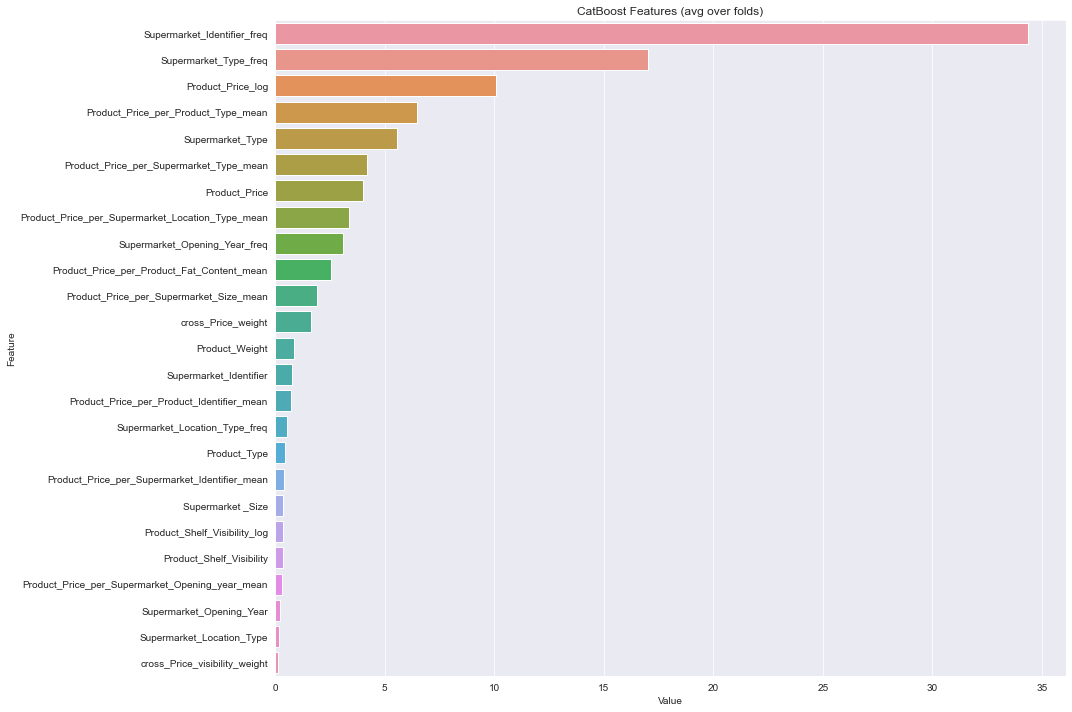

In [37]:
# Plotting features' importance
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('CatBoost Features (avg over folds)')
plt.tight_layout()
plt.show()